<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · TFM</p>
<p style="margin: 0; text-align:right;">2020-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# CODI

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import igraph as ig
import xlrd
import csv
import glob
import re
import time

In [ ]:
# FICHERO CON TODO
#files = glob.glob('Correos*.xlsx')
#csv_file = open('CorreosUP.csv', 'w', newline='', encoding='utf-8')
#for file in files:
#    wb = xlrd.open_workbook(file)
#    for i in range(wb.nsheets):
#        sh = wb.sheet_by_index(i)
#        wr = csv.writer(csv_file)
        
#        for rownum in range(sh.nrows):
#            wr.writerow(sh.row_values(rownum))
#csv_file.close()

In [ ]:
# FICHEROS MES A MES
#files = glob.glob('Correos*.xlsx')
#n=1
#for file in files:
#    csv_file = open('CorreosUP'+str(n)+'.csv', 'w', newline='', encoding='utf-8')
#    wb = xlrd.open_workbook(file)
#    for i in range(wb.nsheets):
#        sh = wb.sheet_by_index(i)
#        wr = csv.writer(csv_file)
        
#        for rownum in range(sh.nrows):
#            wr.writerow(sh.row_values(rownum))
            
#    csv_file.close()
#    n+=1

In [2]:
# LECTURA
dft= pd.read_csv('CorreosUP.zip')
dft.columns= ['Emisor','Receptor','FechaEnvio','HoraEnvio','TituloCorreo','AreaEmisor',
             'AreaReceptor','TipoPersonalEmisor','TipoPersonalReceptor']
dft= dft.drop(dft[dft['Emisor']=='Emisor'].index).reset_index(drop=True)
#df1= pd.read_csv('CorreosUP1.csv')
#df1.columns= ['Emisor','Receptor','FechaEnvio','HoraEnvio','TituloCorreo','AreaEmisor',
#             'AreaReceptor','TipoPersonalEmisor','TipoPersonalReceptor']
print(dft.tail())
print(dft.loc[25411,'Receptor'])

                                                     Emisor  \
13815918  FB91F9AD5516E88320C39AFC37D5F94FCFE1B9FF5B88CA...   
13815919  FE0EA37B07A67DE48B51B6431D9A6E4323133AE811B3B5...   
13815920  FE0EA37B07A67DE48B51B6431D9A6E4323133AE811B3B5...   
13815921  FE0EA37B07A67DE48B51B6431D9A6E4323133AE811B3B5...   
13815922  FEBAC72BC6C7E75F14D6EFC84DD8731DAAC3092143E96B...   

                                                   Receptor  FechaEnvio  \
13815918  10A8469086BF4D4F6BC8B9747C0B9C6F125343EFBA4067...  2020-09-30   
13815919  8E4D4CBE02FF4A0A937B951F242F5E9A74EF2506BD4EAF...  2020-09-30   
13815920  C34BC23A0ED0C73D7558432CC1002C630CB31DDEFC56FE...  2020-09-30   
13815921  84175172DDAE8DBE0E9511D521089103C5681917BCBBEF...  2020-09-30   
13815922  FEBAC72BC6C7E75F14D6EFC84DD8731DAAC3092143E96B...  2020-09-30   

         HoraEnvio                                       TituloCorreo  \
13815918  16:40:59                         Re: BROCHURE PMD - URGENTE   
13815919  01:00:59      

In [3]:
# EXPLODE and DATETIME
start=time.time()
dft['Emisor']= dft['Emisor'].str.split(',')
dft['Receptor']= dft['Receptor'].str.split(',')
dft = dft.explode('Emisor')
dft = dft.explode('Receptor')
dft['Emisor']= dft['Emisor'].str[40:]
dft['Receptor']= dft['Receptor'].str[40:]
dft['Fecha']= dft['FechaEnvio']+' '+dft['HoraEnvio']
def ap(datc):
    return dt.datetime.strptime(datc, '%Y-%m-%d %H:%M:%S')
dft['Fecha']= dft['Fecha'].apply(ap)
dft= dft.reset_index(drop=True)
print(time.time()-start)
#dft[['Emisor','Receptor','Fecha','TituloCorreo']].to_csv('o_vertex.csv',index=False)
print(dft)

334.43524265289307
                                             Emisor  \
0              EB1F535935EFC72D4AFBC577@outlook.com   
1           1E9A1A2B0352D5BA0B9B9354@alum.up.edu.pe   
2         B6A785A03BBEC19FF7E73A53@mindpressive.com   
3                D69098AF12B1BC435E71B32B@up.edu.pe   
4               0B21868B4D7E4D9390E03E9C@oechsle.pe   
...                                             ...   
21344731      5B88CA1CFAAA095BDD3EA70F@valor.com.pe   
21344732   11B3B503E4754A150CD55C67@euromonitor.com   
21344733   11B3B503E4754A150CD55C67@euromonitor.com   
21344734         11B3B503E4754A150CD55C67@kayak.com   
21344735    43E96B897FA4821994680A3F@middlebury.edu   

                                            Receptor  FechaEnvio HoraEnvio  \
0         A1F61FE0BE29EBC364C503CB@mailing.up.edu.pe  2019-11-30  15:30:03   
1                 2E8997E5F38013A626C9D021@up.edu.pe  2019-11-30  15:30:27   
2                 07FD0AB0A4B218CC7776090E@up.edu.pe  2019-11-30  15:30:42   
3       

In [ ]:
# Aliases
ali= pd.read_excel("aliasemails.xlsx",name_sheet=None)
ali['Aliases']= ali['Aliases'].str[40:]
ali['PrimaryEmail']= ali['PrimaryEmail'].str[40:]
print(ali)
start=time.time()
ori=len(set(dft.Emisor))+len(set(dft.Receptor))
print(ori)
for i in range(len(ali)):
    dft.loc[dft.Emisor == ali.PrimaryEmail[i],'Emisor'] = ali.Aliases[i]
    dft.loc[dft.Receptor == ali.PrimaryEmail[i],'Receptor'] = ali.Aliases[i]
    if i%20==0:
        print(i)
print(time.time()-start)
print(ori-len(set(dft.Emisor))-len(set(dft.Receptor)))

In [4]:
# NODES
# Emisor with info mails
dfemar= dft[(dft['Emisor'].notnull()) & (dft['AreaEmisor'].notnull())]
dfemar= dfemar.drop_duplicates(subset='Emisor').reset_index(drop=True)
dfemar= dfemar[['Emisor','AreaEmisor','TipoPersonalEmisor']]
dfemar= dfemar.rename(columns={'Emisor':'Node','AreaEmisor':'Area','TipoPersonalEmisor':'Tipo'})
#print(dfemar)

# Receptor with info mails
dfrear= dft[(dft['Receptor'].notnull()) & (dft['AreaReceptor'].notnull())]
dfrear= dfrear.drop_duplicates(subset='Receptor').reset_index(drop=True)
dfrear= dfrear[['Receptor','AreaReceptor','TipoPersonalReceptor']]
dfrear= dfrear.rename(columns={'Receptor':'Node','AreaReceptor':'Area','TipoPersonalReceptor':'Tipo'})
#print(dfrear)

# addresses (nodes) with info (Emisor and Receptor)
com= set(dfemar['Node']) - ((set(dfemar['Node']) - set(dfrear['Node'])))
dfrear= dfrear[~dfrear['Node'].isin(com)].reset_index(drop=True)
dfar= dfemar.append(dfrear, ignore_index=True)
#print(dfar)

# Emisor with no info mails
dfemsi= dft[(dft['Emisor'].notnull()) & (dft['AreaEmisor'].isnull())]
dfemsi= dfemsi.drop_duplicates(subset='Emisor').reset_index(drop=True)
dfemsi= dfemsi[['Emisor','AreaEmisor','TipoPersonalEmisor']]
dfemsi= dfemsi.rename(columns={'Emisor':'Node','AreaEmisor':'Area','TipoPersonalEmisor':'Tipo'})
#print(dfemsi)

# Receptor with no info mails
dfresi= dft[(dft['Receptor'].notnull()) & (dft['AreaReceptor'].isnull())]
dfresi= dfresi.drop_duplicates(subset='Receptor').reset_index(drop=True)
dfresi= dfresi[['Receptor','AreaReceptor','TipoPersonalReceptor']]
dfresi= dfresi.rename(columns={'Receptor':'Node','AreaReceptor':'Area','TipoPersonalReceptor':'Tipo'})
#print(dfresi)

# addresses (nodes) with no info
com= set(dfemsi['Node']) - ((set(dfemsi['Node']) - set(dfresi['Node'])))
dfresi= dfresi[~dfresi['Node'].isin(com)].reset_index(drop=True)
dfsi= dfemsi.append(dfresi, ignore_index=True)
#print(dfsi)

# exclude nodes with info from those with no info
com= set(dfar['Node']) - ((set(dfar['Node']) - set(dfsi['Node'])))
dfsi= dfsi[~dfsi['Node'].isin(com)].reset_index(drop=True)
#print(len(dfar))
#print(len(dfsi))

# Set Area and Tipo to those who have none,
# forming 3 supernodes for non-info adresses
dfex= dfsi[~dfsi['Node'].str.contains('up.edu.pe')].copy()
dfex.loc[:,['Area','Tipo']]= 'EXTERNAL'
#print(dfex)
dfal= dfsi[dfsi['Node'].str.contains('@alum.up.edu.pe')].copy()
dfal.loc[:,['Area','Tipo']]= 'ALUMNO'
#print(dfal)
dfsi= dfsi[dfsi['Node'].str.contains('@up.edu.pe')]
dfsi.loc[:,['Area','Tipo']]= 'UNKNOWN'
#print(dfsi)

# adresses with official @up.edu.pe become nodes,
# other adresses, though with info, become supernodes relative to alumni and just 'other kind'
dfsw= dfar[~dfar['Node'].str.contains('up.edu.pe')].reset_index(drop=True)
dfin= dfar[dfar['Node'].str.contains('@alum.up.edu.pe')].reset_index(drop=True)
nod= dfar[dfar['Node'].str.contains('@up.edu.pe')].reset_index(drop=True)#.sort_values('Tipo', ascending=False)

#dfnodes.to_csv('o_nodes.csv',index=False)
print(nod)
print(dfin)
print(dfsw)

print(dfsi)
print(dfal)
print(dfex)

                                    Node                            Area  \
0     D69098AF12B1BC435E71B32B@up.edu.pe   DPTO. ACAD. DE CS. SOCIALES Y   
1     C2027A124A0732D0C3541E8B@up.edu.pe   DPTO. ACAD. DE ADMINISTRACIÓN   
2     82B49CB309214A59FF2D7BB1@up.edu.pe  GESTIÓN DE LA INFORMACIÓN E IN   
3     515191E869352A1C15B3E373@up.edu.pe   DPTO. ACAD. DE CS. SOCIALES Y   
4     E44B8B38B19C84432308AB37@up.edu.pe               CENTRO DE IDIOMAS   
...                                  ...                             ...   
4610  884F16F79F7F17E9ADCCA251@up.edu.pe            ESCUELA DE POSTGRADO   
4611  7E8BBA10354468F9876904BC@up.edu.pe            ESCUELA DE POSTGRADO   
4612  C48C92190D87C0B74CDE13A8@up.edu.pe      ESCUELA DE GESTIÓN PÚBLICA   
4613  4CA29DAE7A6A66B732FE1471@up.edu.pe  COMUNICACIONES E IMAGEN INSTIT   
4614  9D3C7881F97DAE9AA17D2DBD@up.edu.pe               CENTRO DE IDIOMAS   

                                      Tipo  
0                       PROFESOR PRINCIPAL

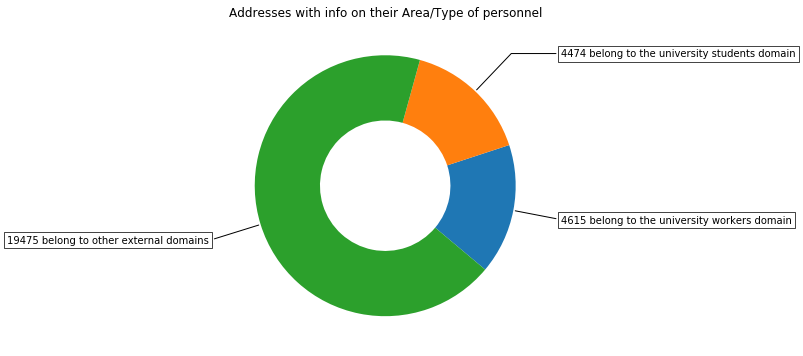

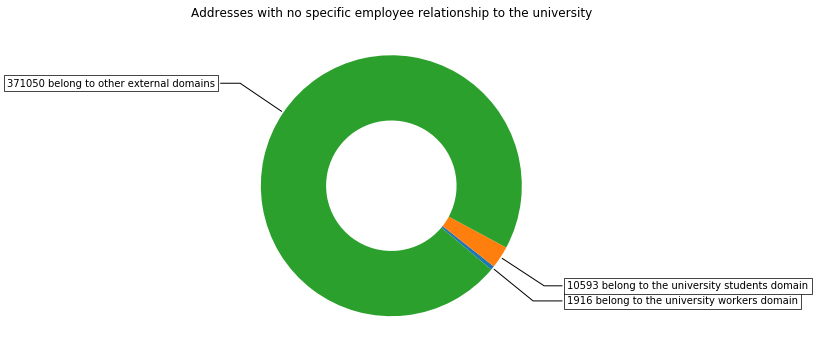

                                               Emisor  \
0                EB1F535935EFC72D4AFBC577@outlook.com   
1             1E9A1A2B0352D5BA0B9B9354@alum.up.edu.pe   
2           B6A785A03BBEC19FF7E73A53@mindpressive.com   
3                  D69098AF12B1BC435E71B32B@up.edu.pe   
4                 0B21868B4D7E4D9390E03E9C@oechsle.pe   
...                                               ...   
21344731  0B21BFF983F0F94BD463DC75@email.mckinsey.com   
21344732        5B88CA1CFAAA095BDD3EA70F@valor.com.pe   
21344733     11B3B503E4754A150CD55C67@euromonitor.com   
21344734     11B3B503E4754A150CD55C67@euromonitor.com   
21344735           11B3B503E4754A150CD55C67@kayak.com   

                                            Receptor  FechaEnvio  
0         A1F61FE0BE29EBC364C503CB@mailing.up.edu.pe  2019-11-30  
1                 2E8997E5F38013A626C9D021@up.edu.pe  2019-11-30  
2                 07FD0AB0A4B218CC7776090E@up.edu.pe  2019-11-30  
3                 D69098AF12B1BC435E71B32B@up.e

In [5]:
# Donut plots
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw=dict(aspect="equal"))

recipe = ["{} belong to the university workers domain".format(len(nod)),
          "{} belong to the university students domain".format(len(dfin)),
          "{} belong to other external domains".format(len(dfsw))]

data = [len(nod), len(dfin), len(dfsw)]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Addresses with info on their Area/Type of personnel")

plt.show()

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

recipe = ["{} belong to the university workers domain".format(len(dfsi)),
          "{} belong to the university students domain".format(len(dfal)),
          "{} belong to other external domains".format(len(dfex))]

data = [len(dfsi), len(dfal), len(dfex)]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Addresses with no specific employee relationship to the university")

plt.show()

dft= dft.loc[dft.index[:-10].tolist() + dft.index[-1:].tolist() + dft.index[-10:-1].tolist()].reset_index()
print(dft[['Emisor','Receptor','FechaEnvio']])#.sample(frac=1).reset_index())

In [5]:
# Reduction from types to general types/codes following indications in roles_def.csv
roldf= pd.read_csv('roles_def.csv', header=None, sep=';', dtype=str)
roldf.columns= ['Tipo','Tipog','Codi']

# Returns dataframe with 2 additional columns + any mismatch
def tipo(n,r):
    n['Tipog']= np.nan
    n['Codi']= np.nan
    for i in range(len(n)):
        if n.loc[i,'Tipo']=='-':
            n.loc[i,'Tipog']= 'GENERAL SERVICES'
            n.loc[i,'Codi']= '000010'
        else:
            for j in range(len(r)):
                if n.loc[i,'Tipo'].strip()==r['Tipo'][j]:
                    n.loc[i,'Tipog']= r['Tipog'][j]
                    n.loc[i,'Codi']= str(r['Codi'][j])
                    break
    mal= n[n['Codi'].isnull()]
    return(n,mal)

nod,mal= tipo(nod,roldf)
dfin,m= tipo(dfin,roldf)
mal= mal.append(m)
dfsw,m= tipo(dfsw,roldf)
mal= mal.append(m)

print(nod)

dfinfo= pd.concat([nod,dfin,dfsw]).reset_index(drop=True)

dfinfo.Area[dfinfo['Area'].str.contains('COMUNICACI')]= 'COMUNICACIÓN E IMAGEN INSTITUCIONAL'
print(dfinfo)

areas= set(dfinfo['Area'])
print(len(areas))
print(areas)
tipos= set(dfinfo['Tipog'])
print(len(tipos))
print(tipos)

                                    Node                            Area  \
0     D69098AF12B1BC435E71B32B@up.edu.pe   DPTO. ACAD. DE CS. SOCIALES Y   
1     C2027A124A0732D0C3541E8B@up.edu.pe   DPTO. ACAD. DE ADMINISTRACIÓN   
2     82B49CB309214A59FF2D7BB1@up.edu.pe  GESTIÓN DE LA INFORMACIÓN E IN   
3     515191E869352A1C15B3E373@up.edu.pe   DPTO. ACAD. DE CS. SOCIALES Y   
4     E44B8B38B19C84432308AB37@up.edu.pe               CENTRO DE IDIOMAS   
...                                  ...                             ...   
4610  884F16F79F7F17E9ADCCA251@up.edu.pe            ESCUELA DE POSTGRADO   
4611  7E8BBA10354468F9876904BC@up.edu.pe            ESCUELA DE POSTGRADO   
4612  C48C92190D87C0B74CDE13A8@up.edu.pe      ESCUELA DE GESTIÓN PÚBLICA   
4613  4CA29DAE7A6A66B732FE1471@up.edu.pe  COMUNICACIONES E IMAGEN INSTIT   
4614  9D3C7881F97DAE9AA17D2DBD@up.edu.pe               CENTRO DE IDIOMAS   

                                      Tipo              Tipog    Codi  
0              

In [7]:
# ARCS
def arcs(tot,ini,fin,nod):
    tot= tot[(tot['Fecha']>=ini) & (tot['Fecha']<fin)]
    tot= tot[(tot['Emisor']==tot['Emisor']) & (tot['Receptor']==tot['Receptor'])]
    tot= tot[tot['Emisor'].isin(nod['Node']) | tot['Receptor'].isin(nod['Node'])].reset_index(drop=True)
    tot= tot[tot['Emisor']!=tot['Receptor']]
    tot= tot[['Emisor','Receptor','Fecha','TituloCorreo']]
    return(tot)

In [8]:
# Adjacency Matrix/Weight
def mad(arc,nod,dfin,dfsw,dfsi,dfal):
    am = np.zeros((len(nod)+5,len(nod)+5),dtype=np.bool)
    awm= np.zeros((len(nod)+5,len(nod)+5),dtype=np.uintc)
    #print(am.shape)
    #print(awm.shape)

    start=time.time()
    for i,a in arc.iterrows():
        #print(a)
        if nod['Node'].eq(a.Emisor).any():
            i1= nod[nod['Node']==a.Emisor].index[0]
        elif dfin['Node'].eq(a.Emisor).any():
            i1= len(nod)
        elif dfsw['Node'].eq(a.Emisor).any():
            i1= len(nod)+1
        elif dfsi['Node'].eq(a.Emisor).any():
            i1= len(nod)+2
        elif dfal['Node'].eq(a.Emisor).any():
            i1= len(nod)+3
        else:
            i1= len(nod)+4
    
        if nod['Node'].eq(a.Receptor).any():
            i2= nod[nod['Node']==a.Receptor].index[0]
        elif dfin['Node'].eq(a.Receptor).any():
            i2= len(nod)
        elif dfsw['Node'].eq(a.Receptor).any():
            i2= len(nod)+1
        elif dfsi['Node'].eq(a.Receptor).any():
            i2= len(nod)+2
        elif dfal['Node'].eq(a.Receptor).any():
            i2= len(nod)+3
        else:
            i2= len(nod)+4 

        #print(i,i1,i2)
        am[i1][i2]=1
        awm[i1][i2]+=1

    print(time.time()-start)
    return(am,awm)

In [9]:
# Get the matrix based on days and their arcs
def mdi(dft,ini,nr,nod,dfin,dfsw,dfsi,dfal,nd,fil):
    for i in range(nr):
        day= ini+dt.timedelta(days=i)
        arc= arcs(dft,day,day+dt.timedelta(days=nd),nod)
        am,awm= mad(arc,nod,dfin,dfsw,dfsi,dfal)
        if nd==1:
            #pd.DataFrame(am).to_csv('{}_am.csv'.format(day.date()),index=False)
            pd.DataFrame(awm).to_csv('{}_awm.csv'.format(day.date()),index=False)
        else:
            pd.DataFrame(awm).to_csv(fil,index=False)
    return(arc,awm)

In [ ]:
# Working data frame, here we can select beginning date, number of repetitions and number of days
arc,awm= mdi(dft,dt.datetime(2020,9,1),1,nod,dfin,dfsw,dfsi,dfal,2,'xxxx_awm.csv')

In [ ]:
awm= pd.read_csv('2020-01-04_awm.csv')
a= np.array(awm.values.tolist())
am= np.where(a>0,1,a).tolist()
print(awm)

In [10]:
# Total Graph List
dini= dt.datetime(2020,1,1)
Glist=[]
start= time.time()
for i in range(274):
    st=time.time()
    d= dini+dt.timedelta(days=i)
    awm= pd.read_csv('{}_awm.zip'.format(d.date()))
    # reading adjacency weighted matrix through igraph
    A= awm.values
    g= ig.Graph.Adjacency((A>0).tolist())
    # Adding the 5 supernodes
    l=list(nod.Node.copy())
    l.append('Alu_In')
    l.append('Ext_In')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Label']= l
    l=list(nod.Area.copy())
    l.append('Alu_Ar')
    l.append('Ext_Ar')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Area']= l
    l=list(nod.Tipog.copy())
    l.append('Alu_Ti')
    l.append('Ext_Ti')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Tipo']= l
    g.es['Peso']= A[A.nonzero()]
    print(time.time()-st)
    Glist.append(g)
print(time.time()-start)

4.954915523529053
4.591581344604492
4.649515390396118
4.519676923751831
4.33408784866333
4.657695770263672
4.493529319763184
4.32162618637085
4.434849739074707
4.339777231216431
4.387683153152466
4.389574289321899
4.375536203384399
4.325627326965332
4.410823106765747
4.494659900665283
4.298887729644775
4.404109716415405
4.31875467300415
4.5327630043029785
4.376893997192383
4.340610027313232
4.410594940185547
4.396594762802124
4.405615568161011
4.499999523162842
4.375212907791138
4.42910099029541
4.372509956359863
4.512135744094849
4.366981744766235
4.333467960357666
4.298501491546631
4.387598276138306
4.399595499038696
4.321645498275757
4.444932222366333
4.422585964202881
4.554555654525757
5.002435922622681
4.620370149612427
4.282534837722778
4.330044746398926
4.381649494171143
4.320458889007568
4.539564847946167
4.269433975219727
4.378494024276733
4.358407974243164
4.404320955276489
4.281876564025879
4.341629266738892
4.349032402038574
4.3796021938323975
4.322925567626953
4.3416137695

In [11]:
# 4 Sections reading
def secred(fi,nod):
    awm= pd.read_csv(fi)
    A= awm.values
    g= ig.Graph.Adjacency((A>0).tolist())
    g.es['Peso']= A[A.nonzero()]
    l=list(nod.Node.copy())
    l.append('Alu_In')
    l.append('Ext_In')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Label']= l
    l=list(nod.Area.copy())
    l.append('Alu_Ar')
    l.append('Ext_Ar')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Area']= l
    l=list(nod.Tipog.copy())
    l.append('Alu_Ti')
    l.append('Ext_Ti')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Tipo']= l
    return(g)

gpc= secred('PreConf_awm.csv',nod)
gcc= secred('Confin_awm.csv',nod)
grc= secred('RelaxConf_awm.csv',nod)
gsc= secred('SegConf_awm.csv',nod)
apc= secred('pcex_awm.csv',nod)
abc= secred('bcex_awm.csv',nod)
aec= secred('ecex_awm.csv',nod)
asc= secred('scex_awm.csv',nod)
print(sum(gpc.es['Peso']))
print(sum(gcc.es['Peso']))
print(sum(grc.es['Peso']))
print(sum(gsc.es['Peso']))
print(sum(apc.es['Peso']))
print(sum(abc.es['Peso']))
print(sum(aec.es['Peso']))
print(sum(asc.es['Peso']))

for t in tipos:
    print(t,len(nod[nod['Tipog']==t]))

4544856
7211592
2875319
2620206
1898020
1602591
1944465
1153667
CAMPUS STAFF 531
GENERAL SERVICES 834
IT STAFF 65
PROFESSOR 2236
ACADEMIC SERVICES 290
INTERN 659


In [12]:
# DELETE SuperNodes
def nosp(g):
    for i in range(5):
        g.delete_vertices(len(g.vs)-1)
for g in Glist:
    nosp(g)
nosp(apc)
nosp(abc)
nosp(aec)
nosp(asc)
#print(asc)

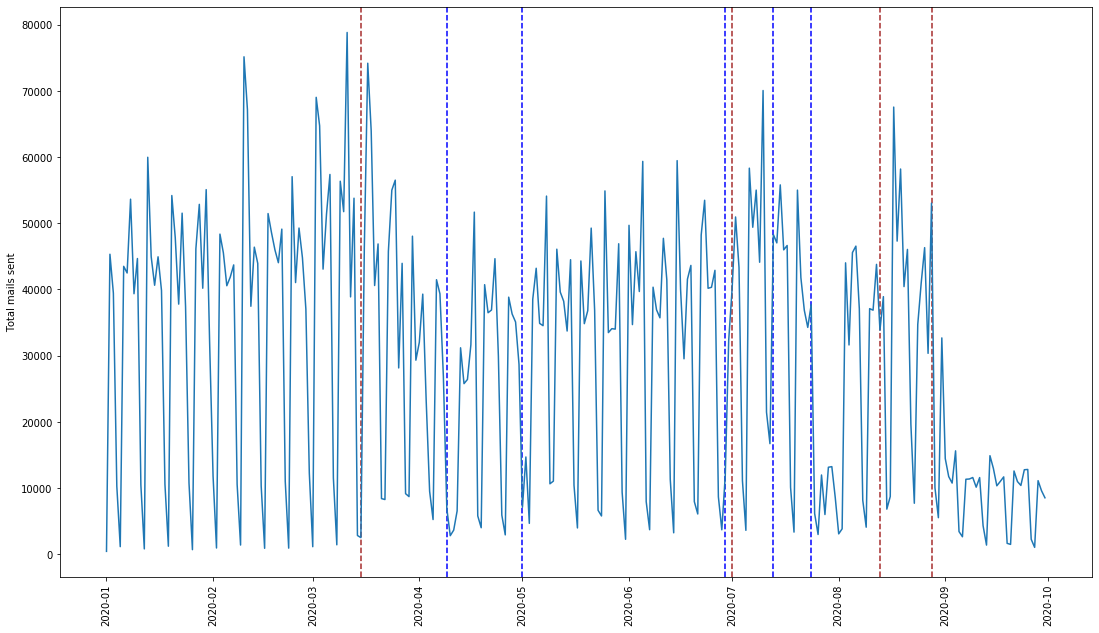

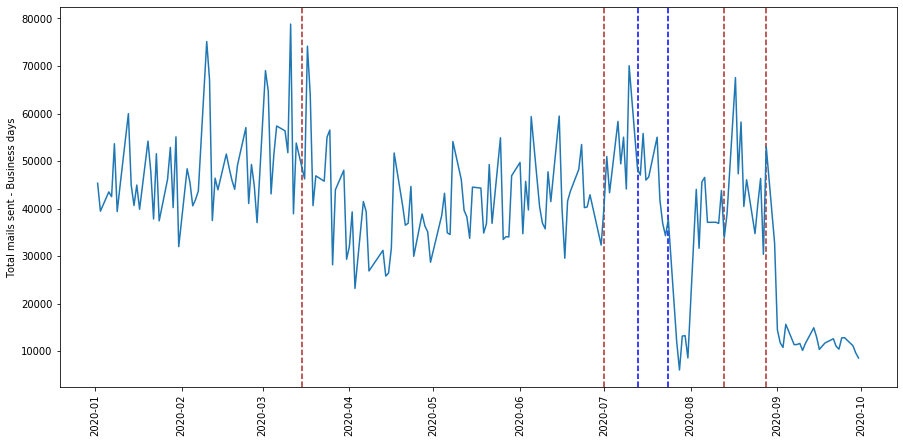

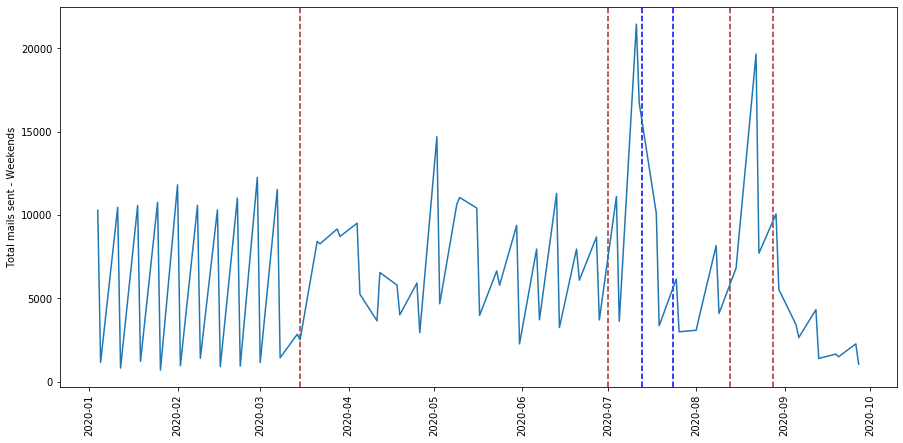

In [13]:
# Total mails sent
pl= pd.DataFrame()
pl['n']= [sum(g.es['Peso']) for g in Glist]
pl['i']=[(dini+dt.timedelta(days=i)).date() for i in range(274)]
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
#plt.axvline(x=dt.date(2020,3,30), color='blue', linestyle='--')  #init classes
#plt.axvline(x=dt.date(2020,4,2), color='brown', linestyle='--')  #strict confine
plt.axvline(x=dt.date(2020,4,9), color='blue', linestyle='--')  #easter
#plt.axvline(x=dt.date(2020,4,23), color='brown', linestyle='--')  #extension
plt.axvline(x=dt.date(2020,5,1), color='blue', linestyle='--')  #festive
#plt.axvline(x=dt.date(2020,5,8), color='brown', linestyle='--')  #extension
plt.axvline(x=dt.date(2020,6,29), color='blue', linestyle='--')  #festive
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #anouncement
plt.axvline(x=dt.date(2020,8,28), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Total mails sent')
plt.plot(pl.n)
plt.show()

glb= Glist[0:3]
glf= Glist[3:5]
w= [(dini-dt.timedelta(days=-1)+dt.timedelta(days=i)).date() for i in range(274)]
we=[]
we.append(dt.datetime(2020,1,4))
we.append(dt.datetime(2020,1,5))
for i in range(38):
    for j in range(5):
        glb.append(Glist[7*i+j+5])
    for j in range(2):
        glf.append(Glist[7*i+j+10])
        we.append(w[7*i+j+9])
glb.append(Glist[-3])
glb.append(Glist[-2])
glb.append(Glist[-1])

# Calcul 1dec
#glb= Glist[1:6]
#glf= []
#glf.append(Glist[0])
#w= [(dini-dt.timedelta(days=-1)+dt.timedelta(days=i)).date() for i in range(301)]
#we=[]
#we.append(dini)
#for i in range(42):
#    for j in range(5):
#        glb.append(Glist[7*(i+1)+j+1])
#    for j in range(2):
#        if i<42:
#            glf.append(Glist[7*i+j+6])
#            we.append(w[7*i+j+5])

#### Total mails - {} Business days
pl= pd.DataFrame()
pl['n']= [sum(g.es['Peso']) for g in glb]
pl['i']= pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #anouncement
plt.axvline(x=dt.date(2020,8,28), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Total mails sent - Business days')
plt.plot(pl.n)
plt.show()

#### Total mails - {} Weekends
pl= pd.DataFrame()
pl['n']= [sum(g.es['Peso']) for g in glf]
pl['i']= we
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #anouncement
plt.axvline(x=dt.date(2020,8,28), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Total mails sent - Weekends')
plt.plot(pl.n)
plt.show()

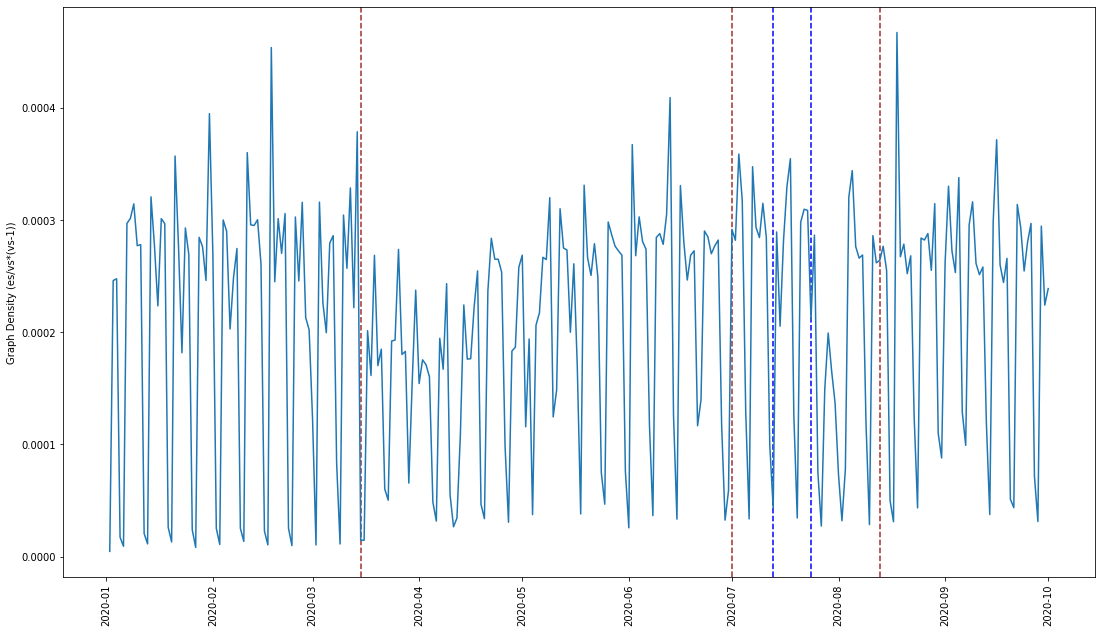

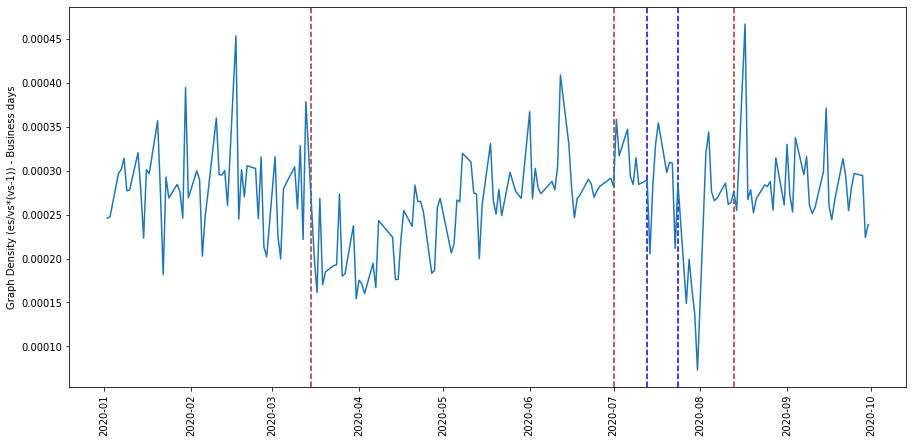

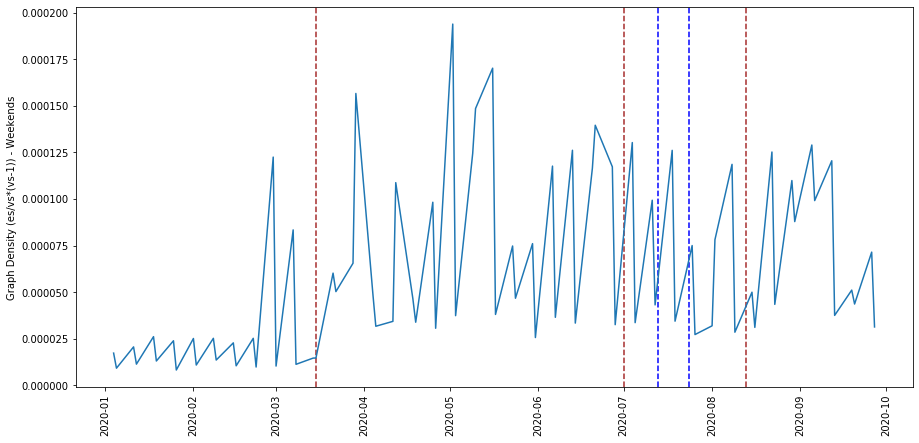

In [14]:
#### Graph Density (es/vs*(vs-1))
pl= pd.DataFrame()
pl['n']= [len(g.es)/(len(g.vs)*(len(g.vs)-1)) for g in Glist]
pl['i']= w
pl= pl.set_index(pl.i)
#pl= pl.drop([dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1))')
plt.plot(pl.n)
plt.show()

#### Graph Density (es/vs*(vs-1)) - {} Business days
pl= pd.DataFrame()
pl['n']= [len(g.es)/(len(g.vs)*(len(g.vs)-1)) for g in glb]
pl['i']= pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1)) - Business days')
plt.plot(pl.n)
plt.show()

#### Graph Density (es/vs*(vs-1)) - {} Weekends
pl= pd.DataFrame()
pl['n']= [len(g.es)/(len(g.vs)*(len(g.vs)-1)) for g in glf]
pl['i']= we
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1)) - Weekends')
plt.plot(pl.n)
plt.show()

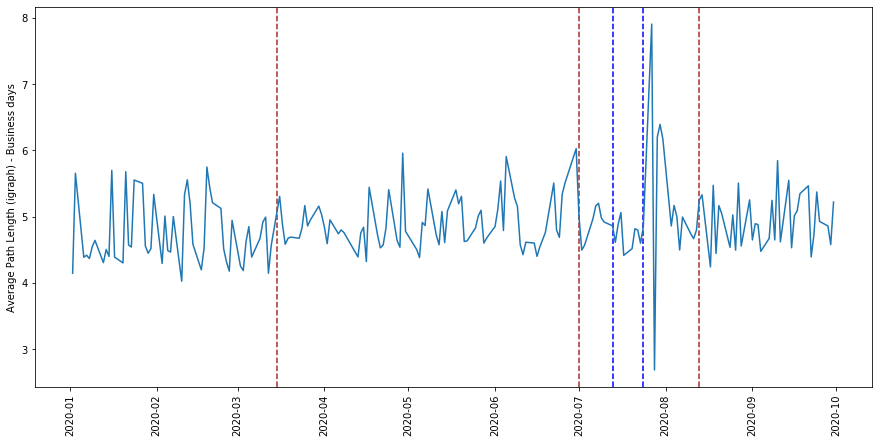

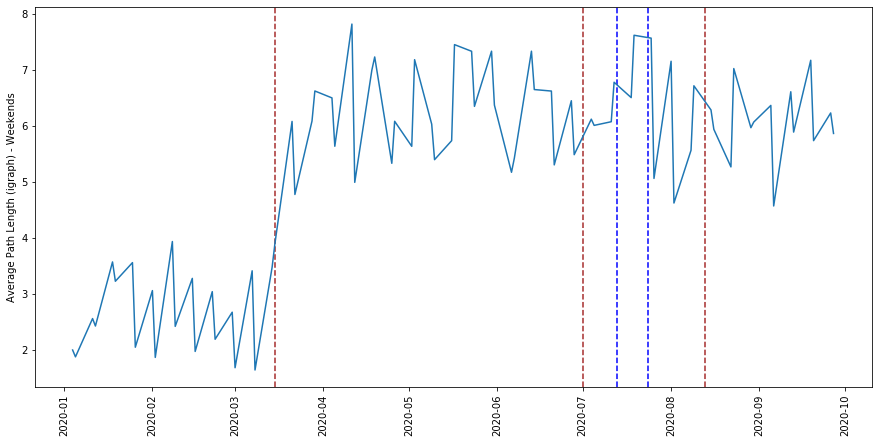

In [15]:
#### Avrg Path Length
pl= pd.DataFrame()
pl['n']= [g.average_path_length() for g in glb]
pl['i']=pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Average Path Length (igraph) - Business days')
plt.plot(pl.n)
plt.show()

pl= pd.DataFrame()
pl['n']= [g.average_path_length() for g in glf]
pl['i']= we
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Average Path Length (igraph) - Weekends')
plt.plot(pl.n)
plt.show()

4614


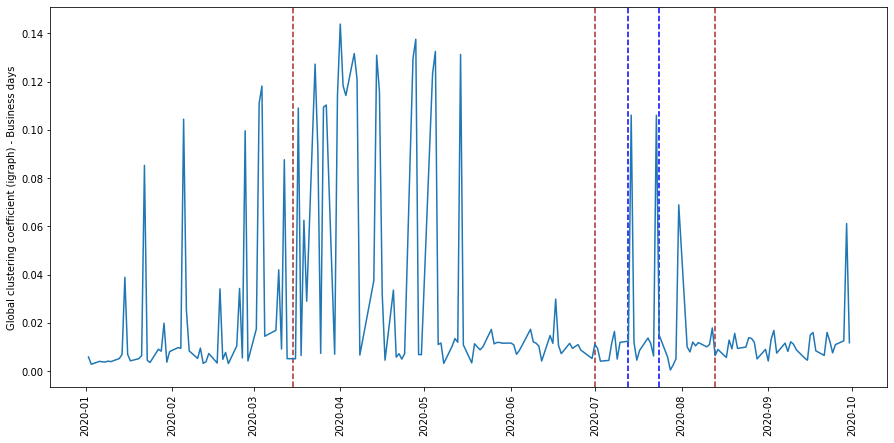

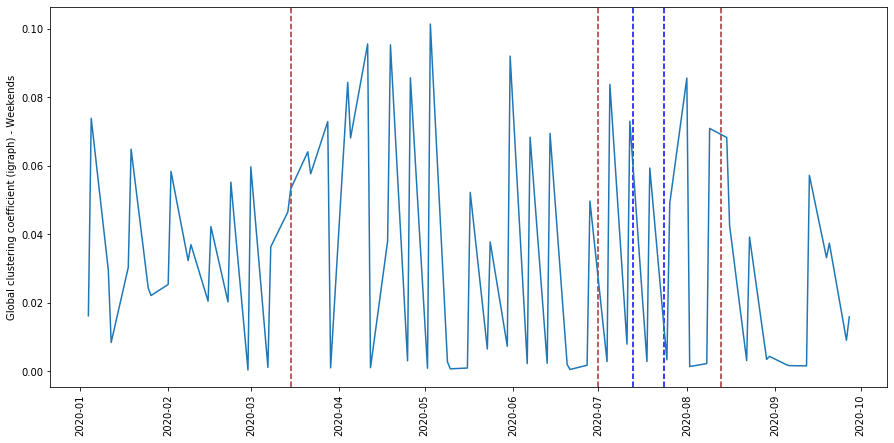

In [16]:
#### Global Clustering Coefficient
print(len(g.vs)-1)
pl= pd.DataFrame()
pl['n']= [g.transitivity_undirected() for g in glb]
#print('Global clustering coefficient: {}'.format(gpc.transitivity_undirected()))
#print('Local average clustering coefficient: {}'.format(gpc.transitivity_avglocal_undirected())
pl['i']=pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Global clustering coefficient (igraph) - Business days')
plt.plot(pl.n)
plt.show()

pl= pd.DataFrame()
pl['n']= [g.transitivity_undirected() for g in glf]
pl['i']= we
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 7)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Global clustering coefficient (igraph) - Weekends')
plt.plot(pl.n)
plt.show()

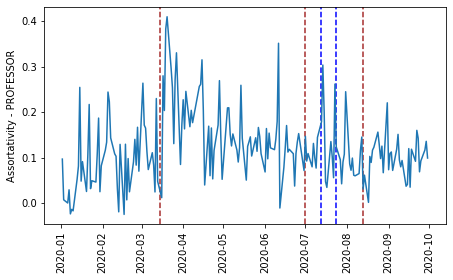

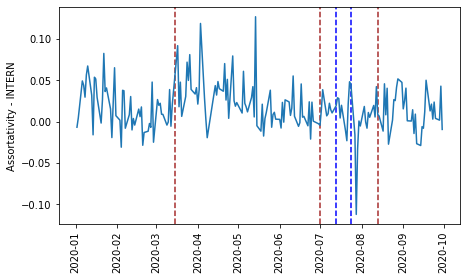

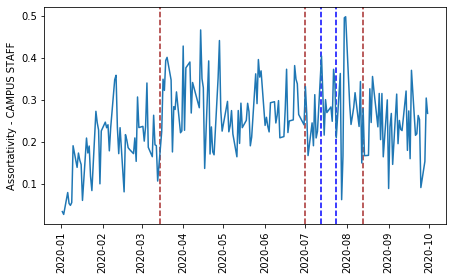

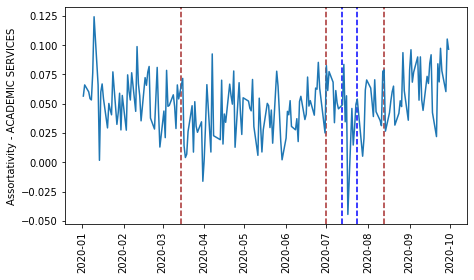

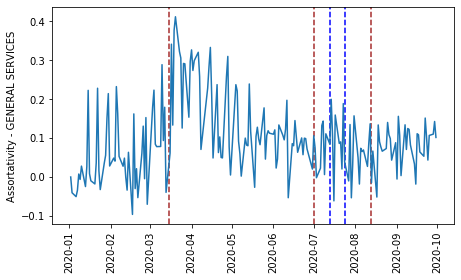

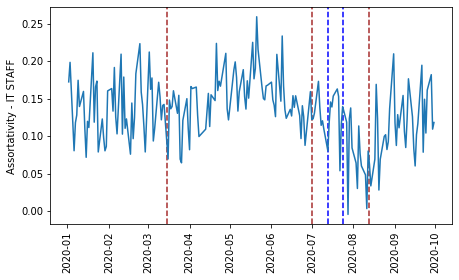

In [17]:
#### Assortativity
for tip in tipos:
    pl= pd.DataFrame()
    vm=[]
    for i in range(len(g.vs)):
        if g.vs['Tipo'][i]== tip:
            vm.append(1)
        else:
            vm.append(0)
    pl['n']= [g.assortativity(types1=vm, directed=True) for g in glb]
    pl['i']=pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
    pl= pl.set_index(pl.i)
    pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(7.2, 4)

    plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
    plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
    plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
    plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
    plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
    plt.xticks(rotation=90)
    plt.ylabel('Assortativity - {}'.format(tip))
    plt.plot(pl.n)
    plt.show()

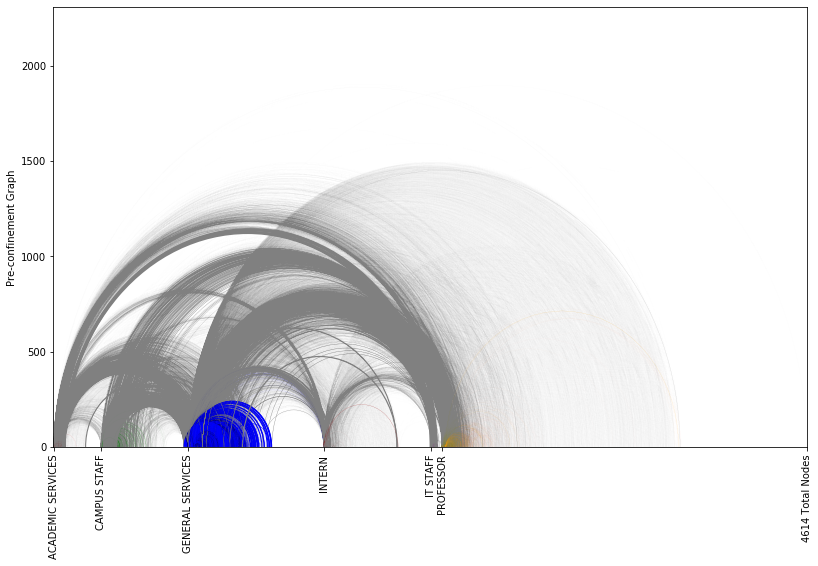

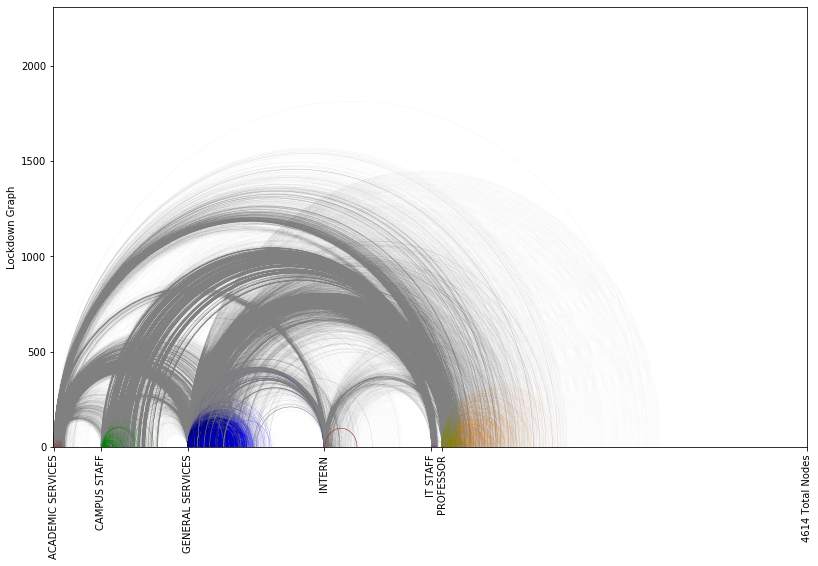

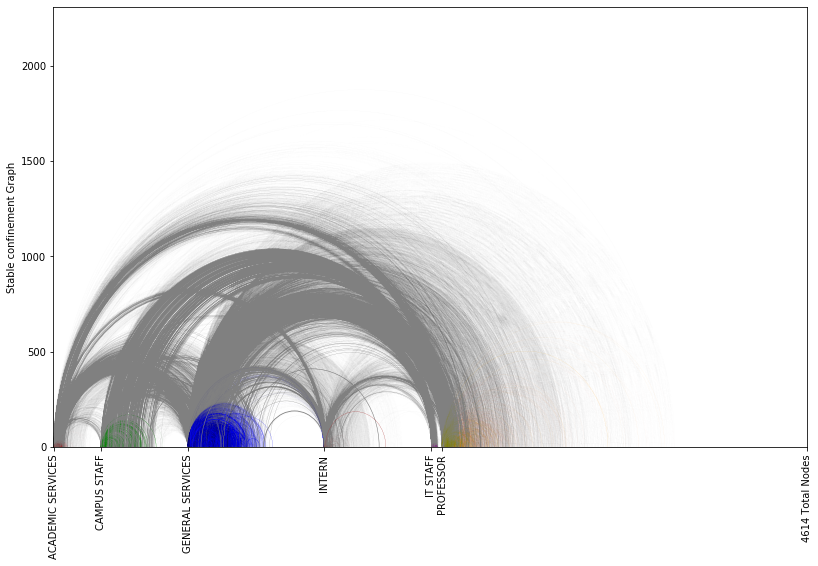

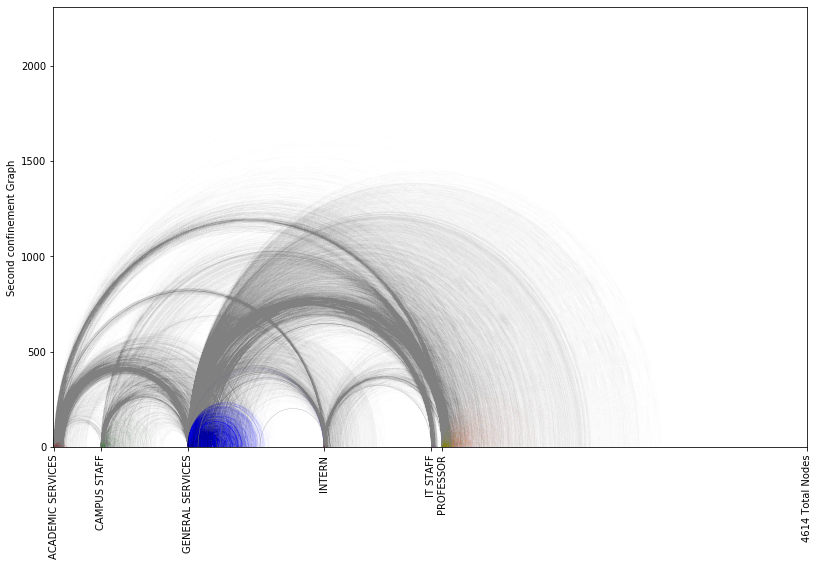

In [18]:
# Graph Arc Plot
from matplotlib import patches

def carc (x1,y1,x2,y2):    # calculate the arc
    mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
    r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
    width = 2 * r
    height = 2 * r
    start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
    end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi
    return (mxmy, width, height, start_angle, end_angle)

def arg(g,tit):
    #start=time.time()    
    #if sin: # with or without supernodes/sorted
        #for i in range(5):
        #    g.delete_vertices(len(g.vs)-1)
    for i in range(len(g.vs)):
        #if i%1000==0:
        #    print(i)
        for j in range(len(g.vs)-i):
            if g.vs['Tipo'][i]>g.vs['Tipo'][i+j]:
                ls= list(range(len(g.vs)))
                a=ls[i]
                ls[i]=ls[i+j]
                ls[i+j]=a
                g= g.permute_vertices(ls)
    
    be=-1
    for i in range(len('tipos')+1):
        be+=1
        bi=be
        if be < 2345:
            while g.vs['Tipo'][be] == g.vs['Tipo'][be+1]:
                be+=1
        else:
            be=len(g.vs)-1
        for j in range(be-bi):
            for k in range(be-bi-j):
                if g.vs[bi+j].degree() < g.vs[bi+j+k].degree():
                    ls= list(range(len(g.vs)))
                    a=ls[bi+j]
                    ls[bi+j]=ls[bi+j+k]
                    ls[bi+j+k]=a
                    g= g.permute_vertices(ls)
            #print(be,bi,j,g.vs[bi+j].degree())
    
    lines=[]
    for e in g.es:
        s,t= e.source, e.target
        if s!=t:
            mxmy, width, height, start_angle, end_angle= carc(s,0,t,0)
            #print(mxmy, width, height, start_angle, end_angle,e['Peso']/50)
            #lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000))
            if g.vs['Tipo'][s] == g.vs['Tipo'][t]:
                if g.vs['Tipo'][s]=='ACADEMIC SERVICES':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='r'))
                elif g.vs['Tipo'][s]=='CAMPUS STAFF':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='g'))
                elif g.vs['Tipo'][s]=='GENERAL SERVICES':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='b'))
                elif g.vs['Tipo'][s]=='INTERN':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='brown'))
                elif g.vs['Tipo'][s]=='IT STAFF':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='purple'))
                elif g.vs['Tipo'][s]=='PROFESSOR':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='orange'))
            else:
                lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/2000, color='grey'))
            
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(13.5, 8.1)
    for l in lines:
        ax.add_patch(l)
    ax.set_xlim(-1, len(g.vs)+.1)
    ax.set_ylim(-1, len(g.vs)/2+1)
    plt.xticks([0,290,821,1655,2314,2379,4614], ['ACADEMIC SERVICES','CAMPUS STAFF','GENERAL SERVICES','INTERN',
                                                 'IT STAFF','PROFESSOR','4614 Total Nodes'], rotation=90)
    #IT STAFF 65
    #INTERN 659
    #PROFESSOR 2236
    #CAMPUS STAFF 531
    #GENERAL SERVICES 834
    #ACADEMIC SERVICES 290

    plt.ylabel('{} Graph'.format(tit))
    plt.show()
    #print(time.time()-start)

def ndt(g,tip,tit):
    for e in g.es:
        if g.vs['Tipo'][e.source] != g.vs['Tipo'][e.target] or g.vs['Tipo'][e.source] !=tip:
            g.delete_edges(e.index)
    print(len(g.vs))
    ids= [v.index for v in g.vs if ((v.degree(mode='OUT')==0 or v.degree(mode='IN')==0) and v['Tipo']!=tip)]
    g.delete_vertices(ids)
    for v in g.vs:
        if v['Tipo']!=tip:
            g.delete_vertices(v.index)
    print(len(g.vs))
    for v in g.vs:
        print(v['Tipo'])
    arg(g,len(g.vs),tit,1)

arg(apc.copy(),'Pre-confinement')
arg(abc.copy(),'Lockdown')
arg(aec.copy(),'Stable confinement')
arg(asc.copy(),'Second confinement')

#for t in tipos:
#    ndt(apc.copy(),t,'Pre-confinement - {}'.format(t))
#    ndt(abc.copy(),t,'Lockdown - {}'.format(t))
#    ndt(aec.copy(),t,'Stable confinement - {}'.format(t))
#    ndt(asc.copy(),t,'Second confinement - {}'.format(t))

Density:0.0019714834638184884
Average path length: 3.034037130360546
Number of active sending nodes: 1548/4615
Number of passive receiving nodes: 1564/4615
Total number of nodes in the network 3112 = 3112


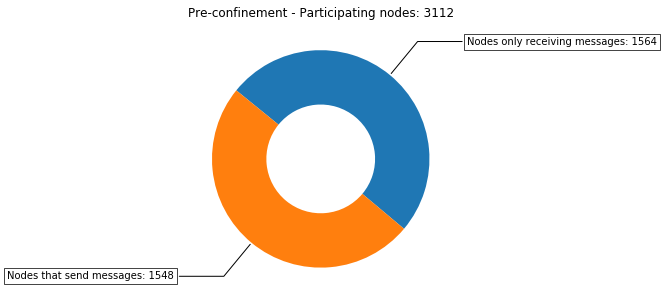

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: Edge directions are ignored for clique calculations at c:\users\vssadministrator\appdata\local\temp\pip-req-build-zv4bjq1q\vendor\build\igraph\igraph-0.8.3-msvc\src\igraph_cliquer.c:57


Number of 3-cliques(triangles): 147135
Average triangles formed by an edge: 95.64572047670639
Min triangles formed by edge: 0 - Max triangles formed by edge: 17662
Global clustering coefficient: 0.03382817916715108
Local average clustering coefficient: 0.29806014958597543


Density:0.0015496667779676626
Average path length: 3.2413821201564663
Number of active sending nodes: 1663/4615
Number of passive receiving nodes: 1369/4615
Total number of nodes in the network 3032 = 3032


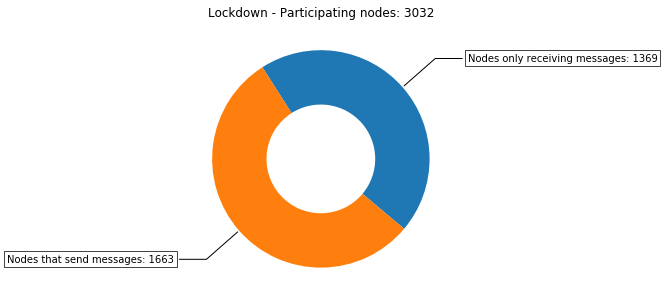

Number of 3-cliques(triangles): 79217
Average triangles formed by an edge: 51.49534127843987
Min triangles formed by edge: 0 - Max triangles formed by edge: 16018
Global clustering coefficient: 0.04753238648977853
Local average clustering coefficient: 0.48436288154732554


Density:0.0020090534202514276
Average path length: 3.2944953880656884
Number of active sending nodes: 1606/4615
Updated number of active sending nodes: 1608/4615
Number of passive receiving nodes: 1497/4615
Total number of nodes in the network 3105 = 3105


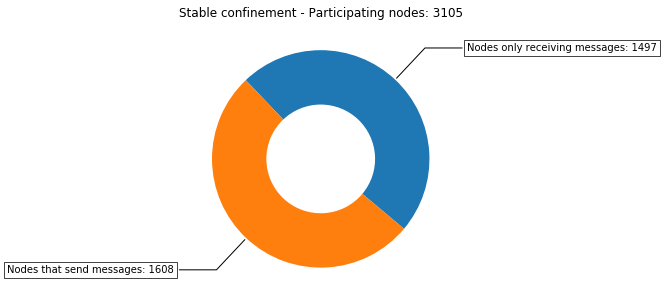

Number of 3-cliques(triangles): 150421
Average triangles formed by an edge: 97.78179848320693
Min triangles formed by edge: 0 - Max triangles formed by edge: 16376
Global clustering coefficient: 0.03638109878798198
Local average clustering coefficient: 0.3285392680512251


Density:0.0017985677393358853
Average path length: 3.282088702306551
Number of active sending nodes: 1586/4615
Updated number of active sending nodes: 1588/4615
Updated number of active sending nodes: 1590/4615
Number of passive receiving nodes: 1317/4615
Total number of nodes in the network 2907 = 2907


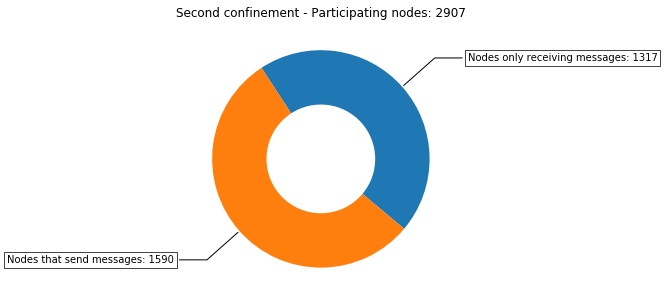

Number of 3-cliques(triangles): 128877
Average triangles formed by an edge: 83.77703141928494
Min triangles formed by edge: 0 - Max triangles formed by edge: 16521
Global clustering coefficient: 0.043882338026036506
Local average clustering coefficient: 0.3804342175343336


65.07254164427727
63.99366921656555
58.43643063964201
67.81514902925896
61.693438606044104
83.62858888210141


In [31]:
# Network Statistics
def tri(g, tit):
    #for i in range(5):
    #    g.delete_vertices(len(g.vs)-1)
    print('Density:{}'.format(len(g.es)/(len(g.vs)*(len(g.vs)-1))))
    print('Average path length: {}'.format(g.average_path_length()))
    
    clu=g.clusters()
    f=0
    for c in clu:
        if len(c)>1 and f==1:
            #print(c)
            for e in c:
                sc.append(e)
            print('Updated number of active sending nodes: {}/4615'.format(len(sc)))
        if len(c)>1 and f==0:
            #print(c)
            sc=c
            f=1
            print('Number of active sending nodes: {}/4615'.format(len(sc)))
    clu=g.clusters(mode='WEAK')
    for c in clu:
        if len(c)>1:
            #print(c)
            re=c
            rc= [x for x in c if x not in sc]
            print('Number of passive receiving nodes: {}/4615'.format(len(rc)))
            print('Total number of nodes in the network {} = {}'.format(len(c),len(rc)+len(sc)))
            
    # DONUTS
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

    recipe = ['Nodes only receiving messages: {}'.format(len(rc)),
              'Nodes that send messages: {}'.format(len(sc))]

    data = [len(rc), len(sc)]

    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title("{} - Participating nodes: {}".format(tit,len(rc)+len(sc)))
    plt.show()
    
    # STATS
    tc= g.cliques(min=3,max=3)
    print('Number of 3-cliques(triangles): {}'.format(len(tc)))
    tf=[]
    for i in range(len(g.vs)):
        n=0
        for t in tc:
            if i in t:
                n+=1
        tf.append(n)
        #if i%1000==0:
        #    print(i)
    print('Average triangles formed by an edge: {}'.format(np.mean(tf)))
    print('Min triangles formed by edge: {} - Max triangles formed by edge: {}'.format(min(tf),max(tf)))
    print('Global clustering coefficient: {}'.format(g.transitivity_undirected()))
    print('Local average clustering coefficient: {}'.format(g.transitivity_avglocal_undirected()))
    print('\n')
    return(re)

lp= tri(apc,'Pre-confinement')
lb= tri(abc,'Lockdown')
le= tri(aec,'Stable confinement')
ls= tri(asc,'Second confinement')

print(len(set(lp) & set(lb)) / float(len(set(lp) | set(lb))) * 100)
print(len(set(lp) & set(le)) / float(len(set(lp) | set(le))) * 100)
print(len(set(lp) & set(ls)) / float(len(set(lp) | set(ls))) * 100)
print(len(set(lb) & set(le)) / float(len(set(lb) | set(le))) * 100)
print(len(set(lb) & set(ls)) / float(len(set(lb) | set(ls))) * 100)
print(len(set(le) & set(ls)) / float(len(set(le) | set(ls))) * 100)

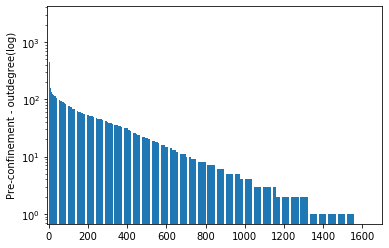

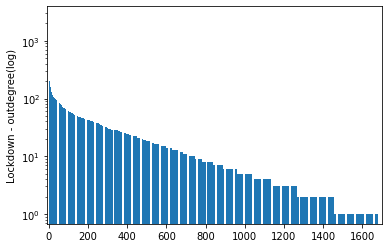

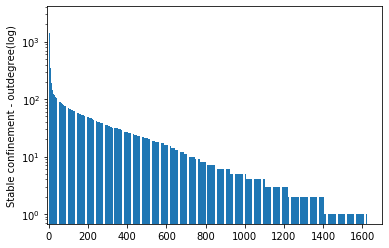

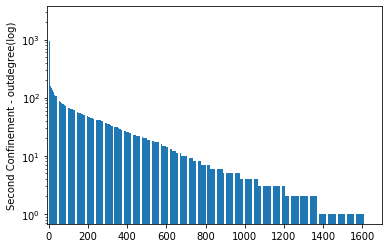

In [21]:
# Outdegree distribution
so= sorted(apc.degree(mode='OUT'), reverse=True)
plt.bar(list(range(4615)),so)
plt.xlim([-10,1700])
plt.yscale('log')
plt.ylabel('Pre-confinement - outdegree(log)')
plt.show()
#print(g.average_path_length())

so= sorted(abc.degree(mode='OUT'), reverse=True)
plt.bar(list(range(4615)),so)
plt.xlim([-10,1700])
plt.yscale('log')
plt.ylabel('Lockdown - outdegree(log)')
plt.show()
#print(g.average_path_length())

so= sorted(aec.degree(mode='OUT'), reverse=True)
plt.bar(list(range(4615)),so)
plt.xlim([-10,1700])
plt.yscale('log')
plt.ylabel('Stable confinement - outdegree(log)')
plt.show()
#print(g.average_path_length())

so= sorted(asc.degree(mode='OUT'), reverse=True)
plt.bar(list(range(4615)),so)
plt.xlim([-10,1700])
plt.yscale('log')
plt.ylabel('Second Confinement - outdegree(log)')
plt.show()
#print(g.average_path_length())

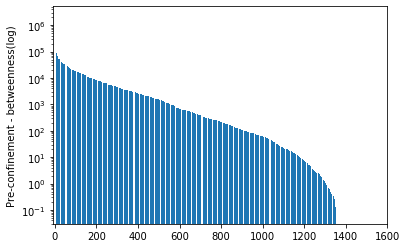

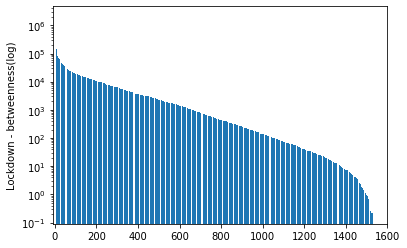

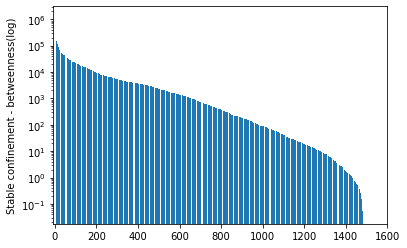

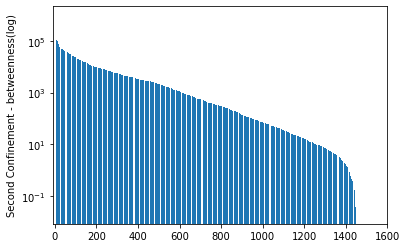

In [22]:
# betweenness distribution
plt.bar(list(range(4615)),sorted(apc.betweenness(), reverse=True))
plt.xlim([-10,1600])
plt.yscale('log')
plt.ylabel('Pre-confinement - betweenness(log)')
plt.show()
#print('\n')
#plt.bar(list(range(4620)),sorted(gpc.edge_betweenness(), reverse=True))
#plt.xlim([-10,720])
#plt.yscale('log')
#plt.ylabel('edge_betweenness(log)')
#plt.show()

plt.bar(list(range(4615)),sorted(abc.betweenness(), reverse=True))
plt.xlim([-10,1600])
plt.yscale('log')
plt.ylabel('Lockdown - betweenness(log)')
plt.show()

plt.bar(list(range(4615)),sorted(aec.betweenness(), reverse=True))
plt.xlim([-10,1600])
plt.yscale('log')
plt.ylabel('Stable confinement - betweenness(log)')
plt.show()

plt.bar(list(range(4615)),sorted(asc.betweenness(), reverse=True))
plt.xlim([-10,1600])
plt.yscale('log')
plt.ylabel('Second Confinement - betweenness(log)')
plt.show()

In [52]:
import random
def viral(g,d,c,m):
    
    clu=g.clusters(mode='WEAK')
    na=[]
    for n in clu:
        if len(n)==1:
            na.append(n[-1])
    g.delete_vertices(na)
    
    vm= np.zeros((len(g.vs),9),dtype=np.float64)
    ini= random.randrange(len(g.vs))
    vm[ini,0] = 1
    re=[]
    print(ini)
    
    nb= g.vs[ini].neighbors(mode='OUT')
    if len(nb) > 0:
        for e in g.es.select(_source=ini):
            g.delete_edges(e.index)
        for v in nb:
            if g.vs[ini]['Tipo']==g.vs[v.index]['Tipo']:
                vm[v.index,1] = 1
            else:
                vm[v.index,1] = 1 * c
    else:
        return([sum(x) for x in vm.T])
    
    #print('0',sum(vm[:,0]))
    #print('1',len(nb),sum(vm[:,1])+1)
    re.append(1)
    re.append(sum(vm[:,1])+1)
    
    i=2
    while(len(nb) > 0) and (d**i >= m) and (sum(vm[:,i-1])>0):
        nbb=[]
        for v in nb:
            nnb= g.vs[v.index].neighbors(mode='OUT')
            for w in nnb:
                rat= g.es[g.get_eid(v.index,w.index,directed=True)]['Peso'] * c
                g.delete_edges(g.es[g.get_eid(v.index,w.index,directed=True)].index)
                if rat >= m and vm[v.index,i-1] >= m:
                    if w not in nbb:
                        nbb.append(w)
                    if g.vs[v.index]['Tipo']==g.vs[w.index]['Tipo']:
                        vm[w.index,i]= (d**i) * vm[v.index,i-1] + max(vm[w.index,:i])
                        #print(i,rat,vm[w.index,i])
                    else:
                        vm[w.index,i]= rat * (d**i) * vm[v.index,i-1] + max(vm[w.index,:i])
                        #print(i,rat,vm[w.index,i])
                    if vm[w.index,i]>1:
                        vm[w.index,i]=1
        
        nb=nbb
        print(i,len(nb),sum([max(x) for x in (vm[:,:i+1])]))
        re.append(sum([max(x) for x in (vm[:,:i+1])]))
        i+=1
            
    #return([sum(x) for x in vm.T])
    for j in range(i,len(vm.T)):
        re.append(sum([max(x) for x in (vm[:,:i+1])]))
    return(re)

60
2 380 321.71199999999953
3 3002 1790.5513984000154
4 3034 2970.7772755886035
5 95 2978.7986308579284
6 1 2978.7986308579284
7 0 2978.7986308579284
1955
1514
2778
2778
2576
284
2 2826 1614.3071999999834
3 3073 2616.140003840057
4 2858 3000.5960888819595
5 9 3000.637068387112
6 0 3000.637068387112
3060
833
2 120 101.7679999999999
3 1156 899.3241215999938
4 3055 2017.5362353069258
5 2891 2936.6922420802916
6 6 2936.6922420802916
7 0 2936.6922420802916
702
2 230 197.03839999999965
3 2964 2765.3262335999952
4 3051 2950.743625494525
5 263 2970.3325514132994
6 0 2970.3325514132994
699
2 686 586.5072000000015
3 3059 2848.2751231999914
4 1341 2975.432544501756
5 19 2975.432544501756
6 0 2975.432544501756
148
2 774 661.449600000002
3 3072 2906.338393599995
4 1110 2987.314073608188
5 1 2987.314073608188
6 0 2987.314073608188
39
2 532 494.71599999999967
3 2954 1982.3047040000206
4 3030 2923.718130032638
5 176 2945.0064584254546
6 1 2945.0064584254546
7 0 2945.0064584254546
979
2 527 404.3279999

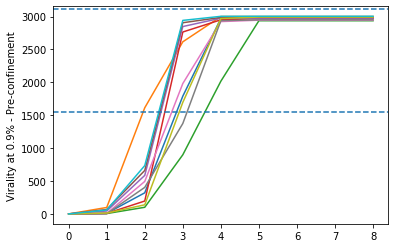

2083
2596
905
2 552 390.50720000000064
3 1699 1250.6381465599968
4 3015 2866.3344781918163
5 143 2872.996595450536
6 0 2872.996595450536
1971
2 114 107.55039999999995
3 2860 1512.1234073599264
4 3062 2366.346164686889
5 2854 2923.6437734092656
6 6 2923.7946942323774
7 0 2923.7946942323774
1474
2 164 116.89759999999998
3 1369 929.3294361600034
4 3068 2736.0561103142945
5 592 2797.6422006279327
6 1 2797.8175669071006
7 0 2797.8175669071006
1678
862
2 316 254.55839999999924
3 1135 890.1064652800051
4 3076 2540.8308940382335
5 742 2624.6009773862547
6 6 2625.278770831766
7 0 2625.278770831766
2977
2 303 225.10560000000007
3 2998 1180.765772799983
4 1728 1645.7693840981233
5 117 1672.8127293393868
6 0 1672.8127293393868
866
2 382 313.83359999999897
3 2998 1685.133158400104
4 3036 2856.1463354154967
5 101 2862.4136865333953
6 6 2863.43880973573
7 0 2863.43880973573
890
2 11 10.200000000000003
3 110 83.74643200000001
4 2921 722.4777829785645
5 3067 2199.6355405639965
6 264 2266.7958999315674


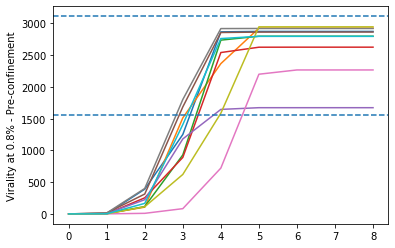

1125
2 335 268.043199999999
3 2944 1274.978193919973
4 3043 2789.4072490205194
5 108 2797.5376486536425
6 1 2797.5376486536425
7 0 2797.5376486536425
2353
645
2 147 111.02159999999996
3 2854 1463.1446758400223
4 3071 2770.9746149236835
5 306 2812.2695810225896
6 0 2812.2695810225896
300
2 595 503.72159999999786
3 3048 1680.8974003199974
4 2964 2933.934158532606
5 15 2934.343065038846
6 0 2934.343065038846
2402
2250
2403
2836
2234
2800
966
2 221 203.9887999999999
3 2825 1087.0099456000264
4 3066 1902.584247350874
5 2864 2579.3479264347397
6 3 2579.3479264347397
7 0 2579.3479264347397
37
2 570 409.54879999999986
3 3039 2754.609510400001
4 2983 2908.156218537578
5 58 2912.301905013149
6 0 2912.301905013149
768
2 35 25.9896
3 675 468.31061248000117
4 3036 1071.903994331917
5 2967 2793.259287741147
6 65 2795.667324350899
7 0 2795.667324350899
2060
1800
199
2 2659 916.2103999999549
3 1846 1591.5901427199908
4 2951 2704.2640254500475
5 13 2706.124054383552
6 0 2706.124054383552
1550
250
2 62 

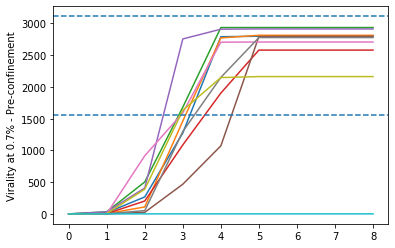

1488
2 70 65.33760000000001
3 804 601.0383539199988
4 3055 2679.8236664406136
5 1179 2811.4366180610004
6 11 2812.55527953469
7 0 2812.55527953469
1708
212
2 2877 978.9840000000002
3 1865 1548.9929523199621
4 2879 2433.197093343238
5 7 2434.140355314489
6 0 2434.140355314489
358
2 117 110.664
3 845 580.003896319999
4 3050 1414.196842407553
5 2940 2910.142791551524
6 8 2910.1934570473322
7 0 2910.1934570473322
1281
2 233 153.31519999999992
3 2902 1276.0270873599716
4 3058 2848.569449726774
5 169 2866.687840751964
6 5 2867.7830747999637
7 0 2867.7830747999637
2566
2660
2223
2551
2364
1339
2 21 16.880000000000006
3 456 318.85230079999934
4 3022 1174.7086777385275
5 3008 2678.334605716884
6 76 2684.159274252496
7 0 2684.159274252496
2423
1068
1884
2787
946
2 144 93.4272
3 1216 673.4284979199995
4 3058 2054.3320379268916
5 618 2144.580026416251
6 0 2144.580026416251
690
2 1135 959.3728000000012
3 3077 2840.087132160004
4 739 2894.9876319600694
5 6 2895.0199519600696
6 0 2895.0199519600696
5

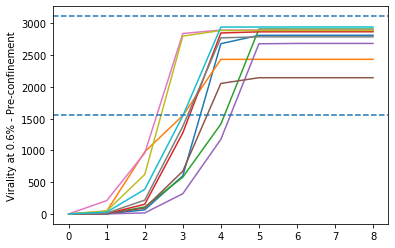

463
2 667 564.543999999998
3 2005 1699.9963391999838
4 2852 2755.8748787916375
5 59 2756.661680144178
6 0 2756.661680144178
2860
401
2 538 475.1879999999987
3 1923 1585.863647999979
4 2886 2291.924767078422
5 261 2300.7144656828555
6 0 2300.7144656828555
214
2 92 90.356
3 680 577.1786367999996
4 2916 2418.328744861659
5 1646 2636.1916882698206
6 55 2639.732091027503
7 0 2639.732091027503
2479
887
2 93 80.70400000000001
3 1106 864.2222079999967
4 2028 1624.5731612426223
5 2794 2594.0507545897976
6 33 2595.258904164005
7 0 2595.258904164005
217
2 104 102.368
3 781 655.162739199999
4 2946 2069.0662804561916
5 1498 2363.01839586923
6 21 2364.086585125918
7 0 2364.086585125918
570
2 679 544.8384000000002
3 2953 2652.647168000005
4 1687 2820.511442268181
5 20 2821.1850690003807
6 0 2821.1850690003807
187
2 2698 2502.624800000006
3 2088 2868.652595199996
4 979 2910.2228409958366
5 3 2910.2228409958366
6 0 2910.2228409958366
808
2 810 699.1935999999994
3 2950 2662.928663040002
4 1482 2804.8526

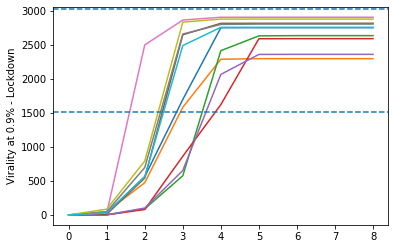

2883
11
2 762 596.2735999999998
3 2967 2345.6476697600356
4 1415 2562.8911315280234
5 26 2563.864638586894
6 0 2563.864638586894
2780
840
1843
2 243 227.51519999999996
3 1487 1081.62731775998
4 2970 2524.6058369548646
5 814 2592.8723118087714
6 4 2592.8892718087714
7 0 2592.8892718087714
1774
2 528 418.06879999999995
3 1813 1345.4443161599788
4 2888 2480.4378018406064
5 263 2494.6610653513576
6 0 2494.6610653513576
889
2 160 131.75039999999993
3 1555 993.1925247999975
4 2973 2222.024015749928
5 804 2298.716089528278
6 4 2298.767024076531
7 0 2298.767024076531
2984
2678
2 81 64.744
3 870 624.0852812800003
4 2959 1988.4188621545927
5 1388 2168.9968423566634
6 19 2170.7822545417052
7 0 2170.7822545417052
2990
2 346 283.36319999999995
3 1857 1383.5517849599937
4 2922 2243.9883408138344
5 331 2264.6287489706683
6 0 2264.6287489706683
1383
2 787 404.80160000000205
3 1461 1205.8147174399858
4 2950 2181.4050887393473
5 502 2230.503027446211
6 2 2230.5318504838265
7 0 2230.5318504838265
1331
2 

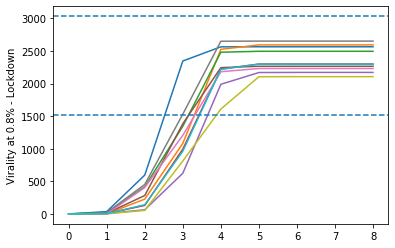

1970
1569
2 117 95.05600000000004
3 1121 845.2756351999944
4 2969 2329.657820815412
5 1193 2436.257232199264
6 10 2437.122678640317
7 0 2437.122678640317
543
2 758 639.9135999999966
3 2001 1602.0513843199856
4 2841 2616.0973927628947
5 55 2617.427753259351
6 0 2617.427753259351
2914
735
2 395 345.76319999999896
3 1430 1151.1512947199994
4 2944 2420.1694566326114
5 628 2476.6154243379974
6 0 2476.6154243379974
2507
2898
352
229
2 183 131.48640000000003
3 2775 2286.2268876799903
4 1952 2625.4897272627527
5 385 2654.3529742928185
6 0 2654.3529742928185
158
2 149 140.52159999999995
3 2753 2266.8970393599934
4 2034 2615.9644775300753
5 613 2647.6048315303556
6 1 2647.6048315303556
7 0 2647.6048315303556
1317
2 581 464.9359999999978
3 2938 2159.515041279992
4 1657 2432.163696508899
5 50 2434.795620504718
6 0 2434.795620504718
532
2 960 725.4623999999967
3 2977 2299.8356902399833
4 1195 2448.117086136706
5 10 2448.2694708423714
6 0 2448.2694708423714
2382
2628
2897
2523
13
2 601 517.827199999

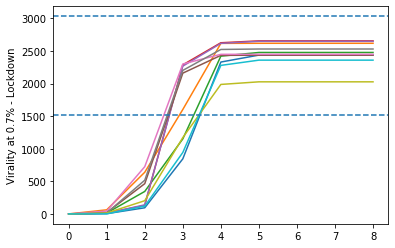

1307
2 24 16.644800000000004
3 554 298.7482240000002
4 2955 1208.4912393150853
5 1550 1535.9627246249713
6 6 1536.2059190048492
7 0 1536.2059190048492
1825
2 69 42.9488
3 934 529.1907430400036
4 2013 1160.341142192953
5 2813 1859.7953605623416
6 36 1862.3085808945282
7 0 1862.3085808945282
1650
1326
2 10 8.2832
3 438 311.62595072
4 1925 1118.364484784118
5 2909 2110.6840748942654
6 93 2118.315159403914
7 0 2118.315159403914
2017
983
2 2679 2034.7552000000107
3 2089 2435.254737919987
4 1028 2514.9201666228014
5 3 2514.9201666228014
6 0 2514.9201666228014
2222
1790
2 122 92.23520000000005
3 1069 760.4521446399992
4 2959 1753.762827168187
5 1124 1926.4648987727364
6 12 1926.712214109555
7 0 1926.712214109555
2034
1610
2 219 173.12639999999985
3 1419 1068.1077836799961
4 2972 1918.5202072093016
5 594 1966.7216684977377
6 0 1966.7216684977377
1295
2 26 16.121600000000004
3 319 200.31874047999992
4 2886 2243.308857465267
5 1839 2486.98324367875
6 119 2493.1856499681508
7 0 2493.1856499681508

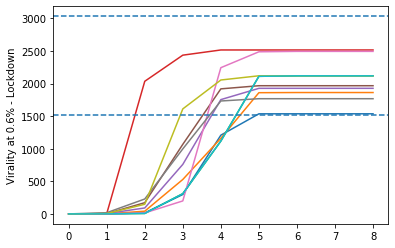

669
2 717 610.6896000000012
3 1957 1559.9898880000057
4 2969 1981.417953239079
5 221 1992.799778085144
6 0 1992.799778085144
2889
2809
1953
1028
436
2 785 666.2312000000022
3 3068 2287.9553663999563
4 2523 2467.5562859191996
5 2 2467.5958683377994
6 0 2467.5958683377994
1515
2750
1795
2 10 11.0
3 120 97.6592
4 1296 832.6792366080057
5 2239 1463.4478220346875
6 2908 1564.3520486747473
7 0 1564.3520486747473
1940
2 772 636.0999999999967
3 1946 1704.5406271999823
4 2972 2057.3617482854843
5 62 2059.0019172684283
6 0 2059.0019172684283
2661
2400
1976
2570
1418
2 595 528.9359999999982
3 1824 1461.174451199996
4 3018 2391.3954312887913
5 2373 2437.5542735153904
6 0 2437.5542735153904
1175
2 99 72.36000000000004
3 449 376.45331199999947
4 2993 2055.8139702886633
5 2595 2277.7833881110923
6 1438 2301.8265203765213
7 0 2301.8265203765213
1661
2 80 77.08399999999999
3 990 769.4862591999951
4 3066 1984.9149180027155
5 2481 2118.4455104792823
6 1 2118.4455104792823
7 0 2118.4455104792823
1659
1027

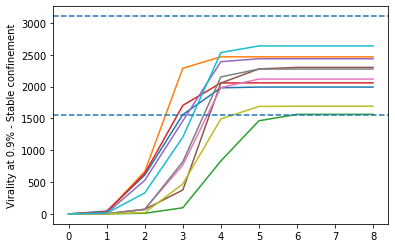

60
2 959 804.3903999999957
3 2630 1769.0972236800235
4 2957 2077.7096426332546
5 82 2089.6132221223625
6 0 2089.6132221223625
1807
682
2 85 65.81600000000002
3 746 522.2839424000006
4 3050 1616.189834289165
5 2524 1719.4190431644117
6 4 1720.1528462969627
7 0 1720.1528462969627
2905
2 175 147.02719999999994
3 2511 1030.6809932800224
4 3055 2025.0723492331438
5 2390 2103.1048548654067
6 0 2103.1048548654067
2705
2156
2805
2 653 473.01440000000065
3 1999 1553.4187084799994
4 2986 1808.2713047818766
5 77 1819.307298790877
6 0 1819.307298790877
2976
2980
1298
2 273 244.3423999999999
3 1339 947.6112358400015
4 3060 2079.2665126379843
5 2417 2156.2562412213824
6 0 2156.2562412213824
884
2 194 159.1519999999999
3 1494 1138.573823999992
4 3064 1856.1221577113631
5 2409 1950.5284965832836
6 0 1950.5284965832836
2251
20
2 926 768.4031999999967
3 3064 2403.834851839933
4 2485 2620.1995247001473
5 4 2620.777772175347
6 0 2620.777772175347
795
2 699 522.9024000000009
3 3063 2141.6450073599526
4 254

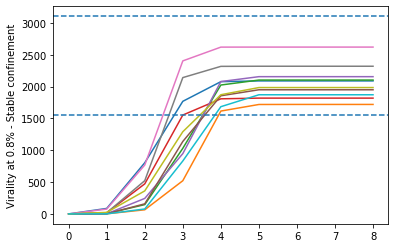

3029
2 115 101.16879999999999
3 1324 923.7381632000017
4 2610 1649.9687912178047
5 2898 1846.170553071954
6 1 1846.2057374440428
7 0 1846.2057374440428
995
2 390 298.2927999999992
3 1700 1243.3940390399985
4 3029 1793.0123408801433
5 2380 1921.0033790900056
6 0 1921.0033790900056
838
2 598 486.71839999999844
3 2600 1600.7946470399488
4 3015 1886.3790787697806
5 559 1909.8434560979802
6 0 1909.8434560979802
2136
1966
252
2 665 548.7023999999979
3 2632 1645.5332531199972
4 2965 2032.0442114310129
5 7 2033.3942703019115
6 0 2033.3942703019115
976
2 564 386.8911999999993
3 1866 1396.1546111999878
4 3013 1638.2785437549105
5 57 1643.0856011502467
6 0 1643.0856011502467
354
2 643 505.1567999999971
3 2611 1695.980572159953
4 2999 2006.506283197173
5 61 2010.7989025966467
6 0 2010.7989025966467
1894
1418
2 595 514.0655999999987
3 1824 1381.7532876799946
4 3018 2119.4263694377223
5 2373 2166.7623805525227
6 0 2166.7623805525227
1512
2 652 542.2528
3 1827 1438.7711167999903
4 3008 2101.369164394

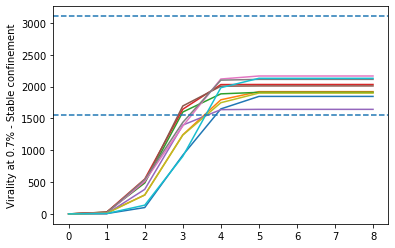

2341
903
2 151 134.04960000000003
3 915 638.0315033599989
4 3055 1669.4729814032635
5 2510 1790.7997312244977
6 19 1791.7792641434507
7 0 1791.7792641434507
2446
1297
386
2 778 624.3679999999971
3 3061 1849.0176972799318
4 1820 2193.537466257402
5 2342 2229.6449207936007
6 0 2229.6449207936007
418
2 934 700.7871999999984
3 3055 1662.0192691199422
4 2503 1902.097933150583
5 8 1902.6611113131685
6 0 1902.6611113131685
895
2 60 47.2736
3 939 654.620019199999
4 2643 1476.8098180022052
5 2927 1638.9346593921262
6 3 1638.9904319699115
7 0 1638.9904319699115
1152
2 234 176.60319999999976
3 1408 916.1504742399936
4 3054 1909.7222876152205
5 2432 1976.996175194075
6 0 1976.996175194075
1209
2815
2937
2984
1871
1875
1074
2 47 25.187200000000015
3 733 352.6503808000017
4 3059 932.4430860574591
5 1815 1181.3684961915733
6 4 1183.054414646319
7 0 1183.054414646319
603
2 251 177.03040000000013
3 1547 865.7256780799903
4 3054 1324.490025925011
5 845 1403.0868880689618
6 0 1403.0868880689618
109
2 101

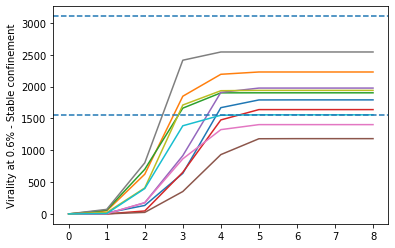

2067
123
1407
2 807 565.9288000000026
3 1976 1409.6171980799916
4 2783 2199.290112080287
5 99 2208.0715025101504
6 0 2208.0715025101504
2220
331
2 1261 939.0488000000121
3 2860 2128.0706585599846
4 938 2244.892850316062
5 5 2245.616437325311
6 0 2245.616437325311
1524
2 2399 1278.8488000000068
3 2030 1988.038876159966
4 2657 2410.1098120150755
5 10 2410.3563935276275
6 0 2410.3563935276275
794
2 256 188.8871999999998
3 1873 1014.732549120007
4 2849 1554.6476242166007
5 1144 1631.383209965652
6 5 1631.7252020623557
7 0 1631.7252020623557
1345
1349
2 426 292.50879999999904
3 1913 1157.2830822400053
4 2810 1540.3105398235427
5 436 1593.734903854698
6 0 1593.734903854698
2172
1192
2 153 116.45039999999993
3 1434 746.93548032
4 2860 1140.213941239812
5 830 1225.4029891326038
6 0 1225.4029891326038
2049
189
2 137 133.4264
3 932 667.6905343999953
4 2850 1502.6735483576272
5 1855 1703.5162875602518
6 40 1708.7252135092594
7 0 1708.7252135092594
61
2 1201 869.8560000000067
3 2856 2382.634191359

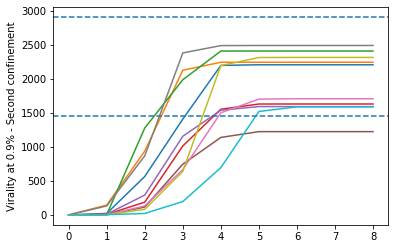

1014
2 198 145.7904
3 1251 737.6255231999968
4 2858 1318.7710094581748
5 1729 1498.1530945038949
6 5 1498.9390872673773
7 0 1498.9390872673773
1527
2 254 160.59360000000007
3 1564 884.0045747200064
4 2864 1832.1238884360407
5 483 1890.7829905010758
6 2 1891.4685270273208
7 0 1891.4685270273208
2546
1880
1317
2001
637
2 444 305.24799999999937
3 2841 1270.8186419199985
4 2247 1709.7535908003645
5 23 1712.2011628282671
6 0 1712.2011628282671
1669
2 173 113.28319999999992
3 1251 645.4647193600049
4 2862 1271.2877120717053
5 629 1344.7359820809347
6 7 1345.910180583251
7 0 1345.910180583251
2766
2 1 1.8
3 0 1.8
258
2 199 135.86239999999992
3 1141 633.7707545600011
4 2862 1030.421726475053
5 860 1181.662441301735
6 2 1182.3010942819456
7 0 1182.3010942819456
1719
29
1740
2 495 315.7024000000008
3 1843 1121.9152255999957
4 2818 2074.7417522298947
5 194 2094.5489796577203
6 0 2094.5489796577203
1320
2 223 136.82879999999997
3 1536 763.9335296000058
4 2841 1685.1692086280475
5 536 1744.42859858

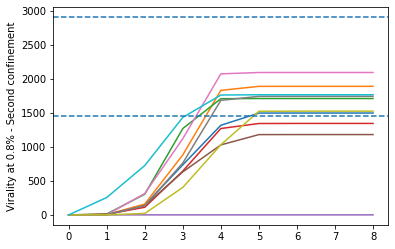

389
2 379 230.0071999999998
3 2024 932.636992
4 2826 1239.757476191454
5 188 1261.5130695158177
6 0 1261.5130695158177
2565
2256
1525
2 17 13.108000000000002
3 379 175.72852480000003
4 2024 616.8128405381077
5 2792 821.8263030118105
6 145 846.1660335240231
7 0 846.1660335240231
742
2 132 78.48639999999995
3 1435 537.450048000001
4 2861 1009.5613619445932
5 714 1079.5099930486376
6 8 1079.7975499802803
7 0 1079.7975499802803
1950
2571
622
2 40 18.962400000000006
3 543 178.47477120000076
4 1787 492.3923649609698
5 2508 836.0956174535551
6 136 855.2325086079562
7 0 855.2325086079562
1700
2 669 392.4447999999992
3 1953 1182.9196185599942
4 2789 1449.9840363258224
5 71 1459.4789150962906
6 0 1459.4789150962906
1032
2 161 138.68480000000002
3 1007 549.0009471999995
4 2861 1038.8735471108344
5 1668 1241.211079339001
6 0 1241.211079339001
2286
1600
2 4 3.4024
3 238 55.33100159999996
4 1311 297.01645809049654
5 2711 1493.2956173776993
6 515 1567.3937035703948
7 35 1570.3743793112437
8 0 1570.37

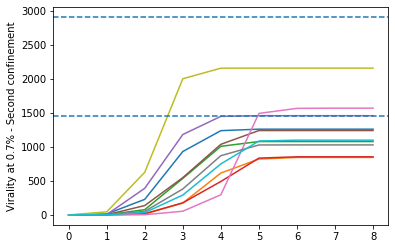

1670
618
2 427 187.15680000000026
3 1623 712.3235967999939
4 2838 1014.9420954370253
5 161 1032.7539576412441
6 0 1032.7539576412441
53
2 334 201.88799999999915
3 1614 746.0559795199925
4 2819 1087.9875825778565
5 282 1123.3105546860863
6 0 1123.3105546860863
1705
1695
2 31 13.888000000000002
3 597 180.8408627200002
4 2789 1338.3909851881526
5 1221 1517.1369388340852
6 20 1519.7034918102872
7 0 1519.7034918102872
2179
357
2 392 209.5471999999996
3 2755 1419.9971916799861
4 2287 1726.2632859565992
5 125 1749.07662664551
6 0 1749.07662664551
148
2 422 252.18079999999992
3 2593 773.5864524799772
4 2788 1432.7826664898464
5 7 1433.3457095856463
6 0 1433.3457095856463
2857
2093
1804
827
1580
1552
2059
2349
1493
262
2 41 28.033600000000007
3 750 317.10887936000034
4 2861 644.5633328005252
5 1639 743.7625864264609
6 0 743.7625864264609
650
2 215 193.82880000000006
3 929 583.9389465600013
4 2848 1089.0023585939873
5 1766 1233.126813197651
6 32 1237.9402064812946
7 0 1237.9402064812946
1894
750

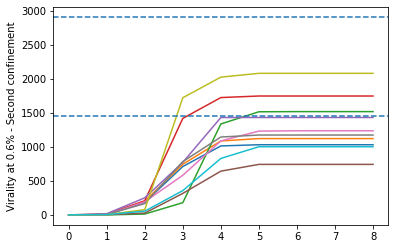

In [56]:
def privir(g,tit):
    it= 10
    th= [.9,.8,.7,.6]
    di= .8
    for t in th:
        i=0
        while i<it:
            res= viral(g.copy(),di,t,0.1)
            if res[1]>res[0]:
                plt.plot(res)
                i+=1
        plt.ylabel('Virality at {}% - {}'.format(t,tit))
        yl= len(g.clusters(mode='WEAK')[0])
        ax.set_ylim(-1, yl)
        plt.axhline(y=yl, linestyle='--')
        plt.axhline(y=yl/2, linestyle='--')
        plt.show()
        
privir(apc,'Pre-confinement')
privir(abc,'Lockdown')
privir(aec,'Stable confinement')
privir(asc,'Second confinement')

2671
112
2 187 128.61999999999992
3 2820 600.5139200000128
4 3031 1118.8813762560194
5 2853 2789.2748851975016
6 10 2789.797830257546
7 0 2789.797830257546
1724
607
1247
2 76 42.38000000000002
3 2799 549.2716800000183
4 3052 1143.129280000019
5 2861 2760.816771008105
6 5 2761.9885696999454
7 5 2763.3703119183906
8 0 2763.3703119183906
2348
853
2 126 98.2799999999999
3 2932 562.2284800000199
4 2933 1015.5057612800213
5 403 1070.0695644936857
6 1 1070.3317084936855
7 0 1070.3317084936855
2489
2082
821
1512
2 26 17.300000000000004
3 505 271.9995199999987
4 2981 1024.0065971199567
5 2992 2537.071629398838
6 92 2551.288268849336
7 0 2551.288268849336
923
2 690 376.4199999999978
3 3046 1285.5156799999975
4 2968 2888.799990272009
5 10 2888.9065502720086
6 0 2888.9065502720086
829
2 282 202.5999999999992
3 1255 892.3827199999931
4 3048 2858.7872460799954
5 525 2891.222257879938
6 0 2891.222257879938
2525
446
2 2852 716.4200000000055
3 3075 2452.924960000012
4 289 2497.523404800012
5 6 2499.188

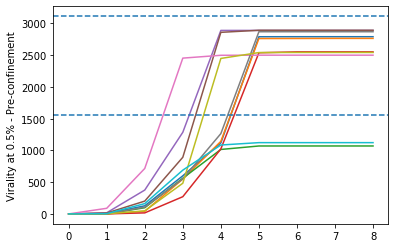

251
2 903 675.403199999994
3 3068 2793.5106150399974
4 944 2872.4749611991074
5 7 2872.969085743108
6 0 2872.969085743108
2933
2 224 155.29599999999976
3 2997 2680.1530342399824
4 3050 2883.92517156045
5 94 2890.068371432868
6 1 2890.068371432868
7 0 2890.068371432868
1903
1261
2 316 85.37760000000017
3 1135 443.8365491199995
4 3063 1229.8119570898896
5 547 1358.5619586430616
6 0 1358.5619586430616
1142
2 423 148.41280000000086
3 1335 586.7514444799968
4 3046 1387.4482723766246
5 333 1440.4374432670295
6 0 1440.4374432670295
2957
1723
217
2 171 99.65600000000006
3 1263 641.2301695999969
4 3080 1972.9940505772456
5 585 2054.4150857769896
6 6 2056.755182426547
7 0 2056.755182426547
2593
583
2 1122 779.6047999999874
3 3067 1375.7995724799591
4 2908 2286.3134674051057
5 7 2286.8998880591857
6 0 2286.8998880591857
2331
823
2 62 34.98879999999999
3 857 421.01065216000325
4 3042 896.9900425814166
5 2937 1520.6818571073234
6 52 1524.847812097238
7 0 1524.847812097238
2955
2585
432
2 670 456.49

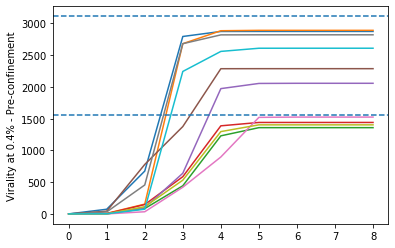

1812
1948
1266
2377
275
2 1281 722.4999999999969
3 2981 2042.1340800000296
4 1325 2176.835261440015
5 10 2177.0881491144037
6 0 2177.0881491144037
2523
775
2 557 436.5799999999975
3 1934 1434.2156799999966
4 2875 2077.3042347519777
5 193 2089.043806527713
6 0 2089.043806527713
1020
2 160 134.55999999999992
3 2776 1059.8608000000038
4 2021 1502.2038103039777
5 245 1560.8195068799982
6 2 1560.8800352589901
7 0 1560.8800352589901
495
2 790 465.73999999999705
3 2948 1572.9459199999717
4 1559 1834.8523691519765
5 34 1838.795271415948
6 0 1838.795271415948
1962
2751
2725
2169
1966
2656
2696
162
2 36 21.40000000000001
3 825 463.9185600000001
4 2967 1990.6072033279568
5 1255 2147.791333026325
6 4 2147.791333026325
7 0 2147.791333026325
216
2 220 143.4199999999999
3 1485 873.1332799999823
4 2975 1660.7172119040242
5 724 1747.8832744732515
6 2 1747.8832744732515
7 0 1747.8832744732515
2672
1599
2 577 401.9199999999974
3 1882 1325.3201599999923
4 2887 2201.0201894399693
5 193 2214.104218499369
6 

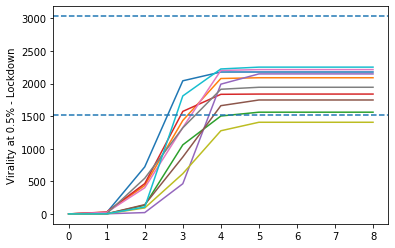

1991
797
2 2677 1182.137599999951
3 2087 1880.4178227199598
4 1066 1996.000430485467
5 3 1996.091909852898
6 0 1996.091909852898
2106
2498
1380
2 69 42.43200000000001
3 727 382.8469939200008
4 2951 794.7243321860165
5 1179 1033.3502559385986
6 10 1034.7254290345031
7 0 1034.7254290345031
737
2 2674 1187.9199999999505
3 2081 1834.585651199959
4 1054 1949.943430279953
5 3 1950.034909647384
6 0 1950.034909647384
117
2 550 382.00319999999806
3 1955 978.3600691200056
4 2875 1530.5911166451974
5 124 1540.0922868914347
6 0 1540.0922868914347
435
2 1345 458.50239999998814
3 2980 1185.7137587199627
4 951 1322.563238554781
5 5 1323.2598891221398
6 0 1323.2598891221398
581
2 872 569.7887999999938
3 2974 1272.9123507199536
4 1336 1442.5827724533253
5 4 1442.9097337862722
6 0 1442.9097337862722
1248
2 144 94.12480000000004
3 2798 1300.6886758399598
4 2007 1776.780848372086
5 601 1825.0412329692012
6 0 1825.0412329692012
9
2 26 20.34400000000001
3 2682 1223.9216383999624
4 2070 1777.5607489248926
5 

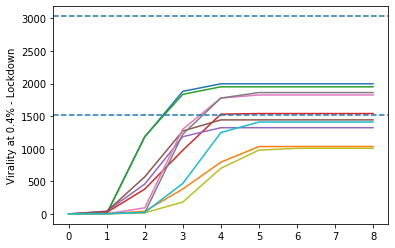

118
2 2847 2139.9400000000333
3 2051 2594.3616000000184
4 2444 2652.4170035200113
5 0 2652.4170035200113
2719
847
2 120 96.57999999999994
3 2448 645.470399999998
4 3036 1581.8258206719663
5 2396 1628.6229420197258
6 0 1628.6229420197258
2205
1164
2 93 57.20000000000001
3 1165 607.5529600000004
4 3061 1702.8052439039632
5 1678 1870.0486867156658
6 51 1884.772933518262
7 1 1884.8720127100642
8 0 1884.8720127100642
1751
2151
918
2 165 79.77999999999986
3 1324 578.9584000000033
4 3057 1358.1729515519926
5 2413 1420.152508097317
6 0 1420.152508097317
2067
2695
2005
2 203 104.89999999999965
3 1161 613.8871999999977
4 3044 851.4409502719799
5 792 953.5220736248752
6 0 953.5220736248752
1780
2 40 24.20000000000001
3 845 431.9724799999976
4 2629 1232.1134013439955
5 2915 1493.6056033779366
6 6 1493.8808633871615
7 0 1493.8808633871615
1224
353
2 1347 894.9599999999948
3 3060 1834.208960000032
4 2450 1961.5949808639984
5 1 1961.6389613291096
6 0 1961.6389613291096
2483
474
2 608 459.399999999996

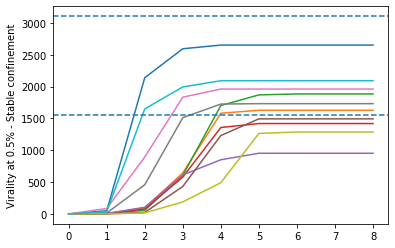

1650
1977
2 197 108.81760000000014
3 1311 732.9859993599971
4 2637 1138.3978964598882
5 2856 1280.8638324576934
6 1 1280.880720956296
7 0 1280.880720956296
298
2 969 665.2175999999919
3 3071 1913.0604339199708
4 2491 2037.5302098034595
5 3 2037.6161091493796
6 0 2037.6161091493796
1282
2 33 15.052800000000003
3 573 253.61059840000001
4 3015 1234.5599790006243
5 2537 1415.4173647640653
6 24 1417.0164672875112
7 0 1417.0164672875112
1409
2 95 57.98559999999999
3 1079 542.5076121600009
4 1980 1132.888874278909
5 2880 1304.322411411072
6 27 1307.4937486913927
7 0 1307.4937486913927
815
2 152 106.06400000000001
3 2886 1317.2516531199815
4 2638 1643.124183352108
5 1522 1700.835753422376
6 0 1700.835753422376
298
2 969 665.2175999999919
3 3071 1913.0604339199708
4 2491 2037.5302098034595
5 3 2037.6161091493796
6 0 2037.6161091493796
1880
495
2 91 42.942400000000006
3 1009 360.5548851200005
4 2640 791.3818067673266
5 995 924.8826580914724
6 0 924.8826580914724
2463
516
2 941 679.3903999999937


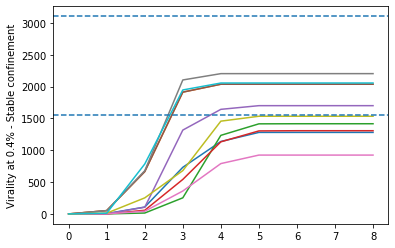

2555
879
2 288 96.3399999999995
3 1568 473.069760000002
4 2784 786.3821391359864
5 229 809.6398698275489
6 0 809.6398698275489
1842
2 64 33.739999999999995
3 806 306.12303999999966
4 2621 661.7353223680268
5 1207 790.3290147557685
6 15 795.7227487695158
7 0 795.7227487695158
2596
1338
1685
2 94 28.30000000000002
3 894 196.76335999999836
4 2593 342.5655523840038
5 1071 415.6283312717125
6 0 415.6283312717125
2418
543
2 310 130.81999999999948
3 2687 1294.3377599999906
4 2697 1587.976567552007
5 152 1600.149281596956
6 33 1604.4736820612216
7 0 1604.4736820612216
2753
2 106 76.44000000000003
3 1276 604.1523199999953
4 2819 1248.5621498880116
5 2467 1350.4085589957226
6 0 1350.4085589957226
1371
2006
1286
2491
2 99 51.959999999999965
3 1136 499.1256000000005
4 2802 1358.308199167985
5 1294 1444.3959486826766
6 12 1444.7653845896093
7 0 1444.7653845896093
1080
2 73 39.06000000000001
3 854 291.34223999999875
4 2599 482.9159569920129
5 869 609.6622935060403
6 28 612.9943593934115
7 0 612.9943

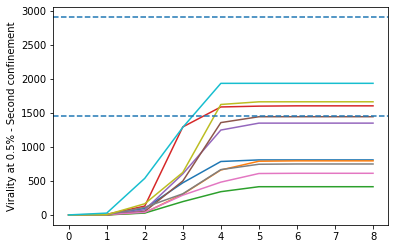

399
2 449 256.8239999999984
3 2834 1822.3071820799921
4 2187 2000.3616068648917
5 39 2002.1311088511309
6 0 2002.1311088511309
650
2 215 174.7344
3 929 463.0530304000024
4 2633 754.974192875908
5 1725 856.3808791577974
6 42 860.6096429934114
7 0 860.6096429934114
80
2 765 454.95999999999384
3 1988 1037.3001369599942
4 2759 1230.071294395151
5 20 1231.5205455534374
6 0 1231.5205455534374
1071
1177
349
2 800 266.75519999999887
3 2651 584.1511884799836
4 1499 746.7590764912617
5 6 746.8382413284615
6 0 746.8382413284615
2616
2684
947
2 392 93.03360000000042
3 1637 412.3317119999952
4 2726 741.6742611009746
5 246 764.164070713891
6 0 764.164070713891
1255
2 42 12.145600000000004
3 830 138.19477248000064
4 1939 331.537918842468
5 792 398.0967402263964
6 69 402.2328536181633
7 0 402.2328536181633
521
2 1088 486.9471999999904
3 2860 1173.6470553600036
4 1451 1324.1052403236677
5 5 1324.2770390155076
6 0 1324.2770390155076
266
2 197 95.31360000000012
3 1352 404.23503615999664
4 1558 635.192587

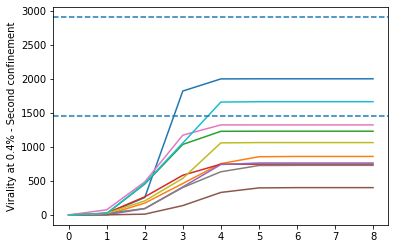

In [54]:
def privir(g,tit):
    it= 10
    th= [.5,.4]
    di= .8
    for t in th:
        i=0
        while i<it:
            res= viral(g.copy(),di,t,0.1)
            if res[1]>res[0]:
                plt.plot(res)
                i+=1
        plt.ylabel('Virality at {}% - {}'.format(t,tit))
        yl= len(g.clusters(mode='WEAK')[0])
        ax.set_ylim(-1, yl)
        plt.axhline(y=yl, linestyle='--')
        plt.axhline(y=yl/2, linestyle='--')
        plt.show()
        
privir(apc,'Pre-confinement')
privir(abc,'Lockdown')
privir(aec,'Stable confinement')
privir(asc,'Second confinement')

2421
2 477 229.198399999998
3 1875 603.5033727999911
4 2773 802.6797047439219
5 68 805.9272610167832
6 0 805.9272610167832
1280
302
2 717 184.59679999999804
3 2814 280.80287999999115
4 490 333.2021744615353
5 0 333.2021744615353
1957
237
2 540 122.14399999999986
3 1654 254.82260480000025
4 848 331.0978084610029
5 57 333.59657353964457
6 0 333.59657353964457
988
2 130 22.929600000000043
3 703 98.13235455999987
4 1053 173.24229741363146
5 546 204.94420502700785
6 1386 224.94923661211908
7 0 224.94923661211908
2676
2 51 21.51200000000001
3 1101 215.74180095999924
4 2810 1123.5834143785025
5 1576 1169.9122008542465
6 41 1171.4130377548368
7 0 1171.4130377548368
2615
2 78 7.779200000000001
3 430 39.821061120000124
4 1082 93.9447357456392
5 774 162.77637935541992
6 220 184.4151450478547
7 24 185.3724373488622
8 0 185.3724373488622
1960
1186
508
2 933 404.8879999999932
3 2261 817.3211519999899
4 2639 1319.1681804042194
5 22 1319.8879207157615
6 0 1319.8879207157615
927
2 468 81.3007999999999


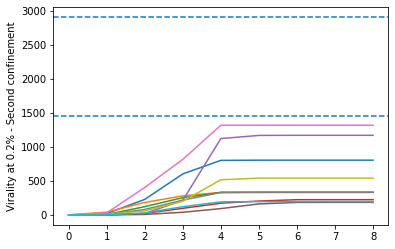

In [73]:
def privir(g,tit):
    it= 10
    th= [.2]
    di= .8
    for t in th:
        i=0
        while i<it:
            res= viral(g.copy(),di,t,0.1)
            if res[1]>res[0]:
                plt.plot(res)
                i+=1
        plt.ylabel('Virality at {}% - {}'.format(t,tit))
        yl= len(g.clusters(mode='WEAK')[0])
        ax.set_ylim(-1, yl)
        plt.axhline(y=yl, linestyle='--')
        plt.axhline(y=yl/2, linestyle='--')
        plt.show()
        
#privir(apc,'Pre-confinement')
#privir(abc,'Lockdown')
#privir(aec,'Stable confinement')
privir(asc,'Second confinement')

In [57]:
def rvir(g,tit):
    it= 100
    th= [.9,.8,.7,.6,.5,.4,.3,.2]
    di= .8
    rtot=[]
    rrtot=[]
    for t in th:
        i=0
        while i<it:
            res= viral(g.copy(),di,t,0.1)
            if res[1]>res[0]:
                rtot.append(res[-1])
                i+=1
        rrtot.append(rtot)
    return(rrtot)
        
rapc= rvir(apc,'Pre-confinement')
rabc= rvir(abc,'Lockdown')
raec= rvir(aec,'Stable confinement')
rasc= rvir(asc,'Second confinement')

492
2 483 399.2359999999983
3 2970 2020.5354752000246
4 3013 2996.1523388825576
5 38 2997.1404344684424
6 0 2997.1404344684424
910
2 62 54.16000000000001
3 848 640.0750719999986
4 3062 1621.4754522685723
5 2926 2887.2330933694993
6 30 2896.854705593519
7 0 2896.854705593519
1037
2 68 66.356
3 799 613.7887231999981
4 3056 2787.1378888990703
5 1185 2904.040814178339
6 11 2905.1247136620896
7 0 2905.1247136620896
1597
2 77 69.00000000000001
3 864 647.8559359999979
4 3061 1473.1066045235484
5 2928 2941.784895536235
6 20 2942.6994999560116
7 0 2942.6994999560116
2188
1226
2 217 172.05599999999956
3 1333 942.964659199998
4 3055 2660.24650729471
5 644 2721.736285738201
6 0 2721.736285738201
2463
882
2 244 222.60719999999975
3 2920 1693.0117094400027
4 3039 2624.3403166515454
5 2827 2981.486550183375
6 8 2981.9647134147503
7 0 2981.9647134147503
2793
1828
374
2 991 868.8607999999972
3 3078 2974.5242175999983
4 849 3006.812046899202
5 6 3006.812046899202
6 0 3006.812046899202
93
2 2661 1426.388

2 437 403.6039999999998
3 1423 1163.5978239999952
4 3052 2750.715687870448
5 359 2777.6607063300794
6 6 2778.2449983748793
7 0 2778.2449983748793
2409
620
217
2 171 156.3319999999999
3 1263 956.224345599997
4 3080 2889.408113315839
5 613 2929.5941152301552
6 6 2929.960072063435
7 0 2929.960072063435
1334
2 214 178.43599999999978
3 2896 1572.3171839999907
4 3060 2864.2357567283116
5 222 2890.5974934395854
6 1 2890.5974934395854
7 0 2890.5974934395854
2044
3055
1127
2 247 215.0983999999997
3 3004 2809.576447999996
4 3042 2976.2659325952
5 90 2982.2752701565837
6 1 2982.2752701565837
7 0 2982.2752701565837
1181
2 355 335.1759999999998
3 1224 1053.4710143999932
4 3071 2747.7894722232118
5 569 2793.5750071693933
6 6 2794.159299214193
7 0 2794.159299214193
1517
2 51 50.628
3 2724 1342.6337663999723
4 3075 2252.7790223360394
5 2892 2901.082423789143
6 15 2901.254605410097
7 0 2901.254605410097
236
2 55 41.426400000000015
3 898 558.5041152000006
4 3077 1225.3536995123432
5 1015 1393.7932677815

2 1137 1008.3327999999955
3 3027 2066.2599449600416
4 2918 3018.6755976683517
5 11 3018.6755976683517
6 0 3018.6755976683517
2127
3053
2244
1027
2 577 415.63200000000074
3 1702 1274.0799667199965
4 3014 2955.573923976802
5 132 2959.113231425349
6 0 2959.113231425349
1309
967
2 129 95.32319999999999
3 1286 800.0994048000035
4 3056 1288.5438599659974
5 2859 2595.367699628306
6 1 2595.367699628306
7 0 2595.367699628306
1471
2 65 46.21760000000002
3 1033 666.4611353600013
4 3056 1424.092305719239
5 2930 2612.013518583093
6 45 2613.3731219031183
7 0 2613.3731219031183
184
2 786 578.5824000000001
3 3022 1946.9620607999373
4 2940 2946.224301048619
5 15 2946.8808130486195
6 0 2946.8808130486195
1074
2 78 73.63040000000001
3 2820 779.3304217600114
4 3058 1519.6273703502213
5 2866 2438.0471971428333
6 6 2441.1122608392184
7 0 2441.1122608392184
2352
2489
10
2 2680 1173.9055999999373
3 1854 1908.8308070399323
4 2943 2889.9411944956005
5 52 2892.062982454121
6 0 2892.062982454121
2050
142
2 346 27

2 112 100.3136
3 951 743.2488089599992
4 3070 2758.77757423043
5 1039 2848.2243618810335
6 6 2848.6875128909896
7 0 2848.6875128909896
2272
1986
831
2 459 380.3183999999984
3 2968 1929.0941439999363
4 3023 2989.602407260159
5 69 2992.503828951039
6 0 2992.503828951039
2587
1413
2 119 97.432
3 1144 791.2886553600015
4 3077 1317.7252342276568
5 842 1439.1514992480018
6 1 1439.1514992480018
7 0 1439.1514992480018
2334
1609
2 750 545.5872000000029
3 1672 1370.9023231999918
4 3004 2921.456051090224
5 210 2933.387093025458
6 0 2933.387093025458
1999
1478
2005
2 269 198.31999999999985
3 1344 957.7079372800029
4 3058 2817.5501444628458
5 454 2847.0139636691138
6 1 2847.0139636691138
7 0 2847.0139636691138
1957
1365
837
2 452 370.86079999999845
3 3032 2831.142763519991
4 2992 2962.087671384475
5 48 2964.939721686386
6 0 2964.939721686386
2836
1253
2082
1850
1202
2 95 94.05279999999999
3 518 426.97113856000055
4 3010 1669.4652303375785
5 3001 2907.6982837427713
6 62 2911.52103978766
7 0 2911.521

2 526 362.3776000000006
3 2946 1329.5066905599501
4 3043 2608.524681354435
5 140 2618.293126268095
6 0 2618.293126268095
1002
3088
2 211 170.78719999999967
3 2981 1250.2901683200037
4 3040 2712.274797121533
5 187 2737.1657840819016
6 1 2737.1657840819016
7 0 2737.1657840819016
230
2 2863 2618.223199999992
3 3085 2908.0508134400006
4 649 2947.05731810509
5 1 2947.05731810509
6 0 2947.05731810509
912
2 136 96.51519999999991
3 1318 939.5391743999927
4 3076 1486.891312923404
5 517 1525.3511151098228
6 5 1525.641815049663
7 0 1525.641815049663
2582
134
2 473 326.09439999999915
3 2970 1359.3700351999337
4 3045 2634.0598681624497
5 141 2654.889438474992
6 1 2654.889438474992
7 0 2654.889438474992
703
2 708 549.1359999999964
3 3059 1653.4382105600025
4 2954 2915.862450216956
5 22 2918.156626780156
6 0 2918.156626780156
1561
2378
2465
3062
1359
2 107 80.65759999999996
3 2929 1042.2935321599605
4 3068 2713.509084073991
5 395 2755.3896392554875
6 6 2756.5452661610875
7 0 2756.5452661610875
1728
1

2 75 57.033600000000014
3 1072 689.3384012800003
4 3072 2301.3392523608377
5 920 2452.7232326717663
6 0 2452.7232326717663
1916
1614
2 316 209.89039999999898
3 1135 803.5036352000054
4 3076 2341.1109264187735
5 652 2435.7008796958353
6 0 2435.7008796958353
2944
2 172 119.60079999999981
3 2855 1487.2688742400112
4 3060 2907.5579554431024
5 409 2928.456814966548
6 1 2928.456814966548
7 0 2928.456814966548
2392
121
2 925 667.2431999999965
3 3084 2765.0354508799965
4 974 2868.065728578355
5 6 2868.065728578355
6 0 2868.065728578355
2655
3051
2 281 250.4879999999996
3 2940 1507.3701888000003
4 3052 2922.2941710131263
5 96 2927.2681029858154
6 1 2927.2681029858154
7 0 2927.2681029858154
1279
1915
136
2 827 587.921599999997
3 3063 1419.9542272000103
4 2930 2967.4759283572735
5 13 2967.4759283572735
6 0 2967.4759283572735
1812
637
2 577 445.15359999999873
3 3051 1438.9281663999482
4 2966 2551.2904255356816
5 33 2558.321539099841
6 0 2558.321539099841
2343
2026
2999
1468
1815
863
2 368 274.6303

2 316 167.82240000000095
3 1135 695.4443519999992
4 3076 2086.1806713028395
5 610 2199.2901334334792
6 0 2199.2901334334792
2863
2 83 60.28800000000003
3 675 432.1317119999976
4 3047 1085.5040607231806
5 2938 2669.686047621278
6 15 2670.479609464837
7 0 2670.479609464837
1983
2 1040 716.6719999999999
3 3053 1340.2123443199519
4 2909 2863.4217313181794
5 6 2863.441315318179
6 0 2863.441315318179
845
2 112 90.64
3 951 679.0076467199995
4 3070 2568.275319654781
5 1003 2679.4040112026246
6 6 2680.1202972770857
7 0 2680.1202972770857
1611
2 378 203.91200000000111
3 1264 818.7719628799961
4 3074 2180.2805573050173
5 484 2262.8470728902294
6 0 2262.8470728902294
698
2 565 423.52959999999746
3 3049 1552.0705203199443
4 2973 2777.410564304062
5 60 2781.1235155878717
6 0 2781.1235155878717
2488
1063
2672
400
2 654 495.32479999999623
3 3011 1719.3083750399012
4 2967 2926.8655189803003
5 17 2927.920437431501
6 0 2927.920437431501
1601
2 316 167.82240000000095
3 1135 695.6802815999993
4 3076 2086.2

3 592 296.6625599999982
4 3037 752.7189634559779
5 2935 2245.19002935404
6 59 2250.3160193566055
7 5 2251.3363872286054
8 0 2251.3363872286054
2922
1309
473
2 2780 623.6400000000081
3 3088 1289.0492800000275
4 505 1410.9818265600331
5 5 1413.4501688320331
6 0 1413.4501688320331
2938
1794
2823
2763
645
2 147 90.41999999999992
3 2854 940.0448000000443
4 3071 2426.4226910719653
5 290 2465.9679401345466
6 9 2466.175466005376
7 0 2466.175466005376
644
2 648 454.43999999999795
3 3067 2499.39408000001
4 1286 2670.157549824008
5 50 2674.677286656008
6 0 2674.677286656008
801
2 346 152.41999999999877
3 2857 764.1665600000232
4 3073 1844.4721651199936
5 255 1908.2909117294935
6 1 1908.2909117294935
7 0 1908.2909117294935
292
2 421 172.49999999999835
3 2898 931.4603200000433
4 3071 2037.9270771199929
5 156 2072.3524865941463
6 0 2072.3524865941463
2296
1083
2 490 234.19999999999808
3 2981 992.0801599999902
4 3014 2841.7466841600053
5 30 2843.849541888005
6 0 2843.849541888005
2614
2422
1215
2 370

2 107 64.06000000000002
3 1009 484.29903999999647
4 3061 2517.5270087680065
5 722 2629.4875898821047
6 5 2632.964954106105
7 0 2632.964954106105
1241
2 453 230.119999999998
3 2955 1063.7184000000398
4 3046 2109.973491456003
5 264 2181.6039008825414
6 0 2181.6039008825414
859
2 98 89.04000000000002
3 723 431.61759999999623
4 3025 1139.1395271679798
5 2983 1877.8229731399986
6 66 1882.0889910917836
7 1 1882.0889910917836
8 0 1882.0889910917836
1265
2 225 160.91999999999965
3 2886 859.3267199999848
4 3058 1322.0719779839972
5 215 1360.6955135283972
6 1 1360.6955135283972
7 0 1360.6955135283972
1227
2 316 124.29999999999919
3 1135 576.4151999999991
4 3076 1689.767130367995
5 605 1819.3456905990065
6 0 1819.3456905990065
5
2 505 344.7199999999982
3 2981 1280.8913599999994
4 3001 2694.181162496007
5 115 2706.2710065043952
6 0 2706.2710065043952
1895
629
2 469 344.1399999999983
3 2971 1170.3934400000144
4 3016 2679.794480639995
5 58 2688.1765641846737
6 0 2688.1765641846737
1110
2 67 33.26000

2 807 383.9551999999975
3 3064 1114.444597759944
4 2937 2729.9891980869625
5 6 2730.1234158149628
6 0 2730.1234158149628
975
2 160 104.44000000000003
3 2881 568.7335705599947
4 3066 914.1707781611282
5 117 935.0123012959724
6 1 935.2744452959726
7 0 935.2744452959726
964
329
2 1197 835.2255999999853
3 3063 1588.5263743999376
4 2894 2433.607901731277
5 1 2433.607901731277
6 0 2433.607901731277
341
2 727 531.166399999996
3 3053 1320.5057203199622
4 2929 2919.872545292291
5 17 2920.1821292994587
6 0 2920.1821292994587
2926
670
2 728 531.766399999996
3 3056 1341.275409919953
4 2947 2773.068917531448
5 15 2773.7908183990317
6 0 2773.7908183990317
2021
1037
2 68 46.04319999999999
3 799 492.26161920000067
4 3056 2025.2959910723828
5 1177 2201.0822298901444
6 11 2202.540243740945
7 0 2202.540243740945
1795
1561
2837
2051
654
2 443 170.50080000000108
3 2947 802.7536844799531
4 3045 1654.3091182886885
5 110 1669.241799278475
6 0 1669.241799278475
254
2 462 243.6768000000002
3 3014 916.7628825599

2 236 147.1584000000001
3 2855 771.0204927999641
4 3063 2716.2848827392013
5 324 2756.4236650919993
6 2 2756.4236650919993
7 0 2756.4236650919993
2175
600
2 2857 567.4063999999709
3 3079 2298.400069120008
4 201 2335.8267730862162
5 6 2339.6448608788564
6 0 2339.6448608788564
2194
2913
2106
3085
2 80 37.11520000000001
3 762 300.54554112
4 3069 540.2563985735972
5 758 744.0734267064666
6 5 744.455938391579
7 0 744.455938391579
1002
2381
2284
2575
1244
2 325 93.57760000000034
3 1233 511.81342463999965
4 3066 1297.0539531632653
5 374 1350.4898842656721
6 0 1350.4898842656721
1035
1907
2 701 292.9312
3 3041 872.5450137599584
4 2966 2741.561905908934
5 7 2741.9510435946427
6 0 2741.9510435946427
253
2 316 85.58240000000018
3 1135 444.0413491199995
4 3063 1229.9952822534096
5 547 1358.7452838065815
6 0 1358.7452838065815
1993
1500
2 79 46.04160000000001
3 2824 740.5937126400393
4 3071 2757.95598006928
5 349 2793.531654586931
6 6 2794.8520703309314
7 0 2794.8520703309314
238
2 592 456.00319999

2 316 52.6664000000003
3 1135 306.89825663999846
4 1455 725.0359594528757
5 504 800.2220374068194
6 62 805.9496903654003
7 0 805.9496903654003
604
2 305 84.7696
3 2912 447.92617216001287
4 1368 755.5413401104526
5 80 766.7030273375331
6 0 766.7030273375331
1444
2 98 62.30880000000004
3 846 291.4705484799995
4 3014 1603.7725928431457
5 1024 1753.1447361646299
6 14 1756.1358237882494
7 0 1756.1358237882494
1146
2 407 147.80559999999963
3 2935 768.8076889600218
4 2994 1654.5156121464433
5 97 1665.7719170958483
6 0 1665.7719170958483
939
2 527 163.03519999999924
3 2978 600.6746444800034
4 2928 2530.5648038961167
5 21 2533.1756158615563
6 5 2535.1041022615564
7 0 2535.1041022615564
1854
1273
2391
2871
2 741 402.8999999999985
3 3065 2547.14257408002
4 1195 2687.8265777053903
5 21 2690.190599299862
6 0 2690.190599299862
2489
1525
2 12 3.5656000000000003
3 251 134.8721856000002
4 1333 460.4882506002461
5 2968 2084.8376708147657
6 394 2133.9644765882817
7 0 2133.9644765882817
1609
2 750 186.152

2 295 119.76480000000002
3 1461 541.4680345599966
4 3018 1013.866356847403
5 255 1033.1483942497423
6 0 1033.1483942497423
636
2 228 105.37760000000003
3 1363 511.6038246399998
4 3035 1184.047874536222
5 432 1237.4023403579697
6 1 1237.6644843579697
7 0 1237.6644843579697
2243
693
2 446 106.68639999999951
3 1197 309.35830783999927
4 1116 532.6462480523256
5 438 577.6756635640972
6 11 578.1836757080731
7 0 578.1836757080731
2422
1685
2038
1519
1035
491
2 668 166.70239999999887
3 3032 451.52197375998344
4 2897 2360.608415957792
5 51 2367.3068006131243
6 0 2367.3068006131243
1794
2406
953
2 399 92.41919999999962
3 1206 329.50344703999843
4 1178 542.3837154205687
5 285 571.9367541457483
6 11 572.5080755153851
7 0 572.5080755153851
2729
426
2 871 424.7407999999948
3 3059 2462.680350719979
4 1043 2597.6154625621907
5 6 2599.2313365979026
6 0 2599.2313365979026
1742
2418
584
2663
2112
3012
2 264 57.19680000000007
3 1308 291.169564159998
4 2953 2328.5691522039738
5 578 2384.7945610881247
6 5 2

4 2982 561.7297837932564
5 2881 2289.344020127798
6 7 2289.5845382963744
7 0 2289.5845382963744
2826
2034
1101
2 31 7.8240000000000025
3 726 95.52785408000037
4 1122 315.1314667790331
5 2938 772.9544083066286
6 269 790.1051401092765
7 0 790.1051401092765
2117
1101
2 31 7.8240000000000025
3 726 95.52785408000037
4 1122 315.1314667790331
5 2938 772.9544083066286
6 269 790.1051401092765
7 0 790.1051401092765
2043
2613
2821
2871
2 741 331.3311999999957
3 3059 2221.2265804799977
4 1177 2344.352140539504
5 20 2346.9148521509833
6 0 2346.9148521509833
1419
2 101 51.37760000000001
3 1064 183.30022143999875
4 2915 550.0155890147294
5 2856 2290.0248967516436
6 31 2295.725396680262
7 5 2297.067573960262
8 0 2297.067573960262
452
2 982 568.1231999999943
3 3059 2286.0482227199936
4 759 2345.2657707925514
5 0 2345.2657707925514
2001
68
2 2850 276.9503999999897
3 2943 946.9523763199915
4 144 981.072547785106
5 0 981.072547785106
1731
2982
2 206 84.31360000000004
3 1280 524.0590489599977
4 3044 2234.0

2 289 275.59839999999986
3 2788 2490.615347199991
4 1898 2797.2498278809844
5 442 2819.513312855109
6 1 2819.513312855109
7 0 2819.513312855109
2335
950
2 110 86.62239999999991
3 1318 743.9809535999931
4 2964 2245.9112492359636
5 1172 2373.2950904953505
6 17 2373.8979085628143
7 0 2373.8979085628143
2909
2 482 379.1919999999998
3 1947 1519.1743078399907
4 2893 2671.081515397898
5 147 2680.43034956929
6 0 2680.43034956929
2073
2940
1022
2 46 40.540000000000006
3 715 478.1915008000016
4 2018 1329.9719269089271
5 2841 2318.2138471494995
6 65 2322.8936614417767
7 0 2322.8936614417767
2079
1560
2 1084 740.0664000000082
3 2947 2677.9483545600124
4 1529 2835.586400809798
5 46 2836.9801078283976
6 0 2836.9801078283976
726
2566
2 242 197.36479999999958
3 1368 1081.4629683199933
4 2948 2557.3544689573373
5 674 2595.655139033185
6 2 2595.655139033185
7 0 2595.655139033185
3016
2 36 30.880000000000006
3 771 568.5063679999972
4 2969 2314.111540244457
5 1361 2477.840896398241
6 8 2478.2315394606826


2 563 463.78480000000155
3 2926 2614.706958079999
4 1735 2820.5271297331356
5 90 2822.80216922359
6 0 2822.80216922359
306
2 106 105.68
3 1343 982.0984959999782
4 2971 2538.784791244751
5 1126 2626.8070150089316
6 13 2629.3006562249316
7 0 2629.3006562249316
132
2 40 35.88000000000001
3 651 487.6931199999994
4 1943 1417.0282133503918
5 2866 2367.9213477139083
6 151 2376.9028591275287
7 0 2376.9028591275287
1010
2 251 240.46399999999988
3 2782 2495.2590335999944
4 1944 2814.8455371735267
5 382 2834.560252826589
6 2 2834.6358960065063
7 0 2834.6358960065063
2812
169
2 528 457.09279999999865
3 2920 2584.0635263999984
4 1753 2808.229960466449
5 67 2809.8115835552576
6 0 2809.8115835552576
2630
3025
2 17 15.992000000000003
3 336 257.31679999999966
4 1872 1057.6900798873628
5 2920 1911.2617593041232
6 215 1931.9426965578803
7 0 1931.9426965578803
2398
717
2 790 467.08000000000345
3 1469 1292.5355571199984
4 2951 2407.3576125734726
5 469 2448.429846840493
6 2 2448.429846840493
7 0 2448.429846

2 560 457.9727999999974
3 2001 1640.460735999989
4 2873 2673.692082743761
5 76 2675.1577629192875
6 0 2675.1577629192875
2503
760
2 2697 2363.779199999944
3 2089 2742.2235135999445
4 899 2793.580846919629
5 4 2793.580846919629
6 0 2793.580846919629
2696
273
2 40 39.455999999999996
3 785 656.6096998399993
4 2957 2380.91113387867
5 1500 2534.593388315188
6 21 2536.515768667857
7 0 2536.515768667857
999
2 180 165.52959999999993
3 2778 2291.8996812800588
4 1990 2622.8092580782545
5 392 2651.3915174056947
6 2 2651.4084774056946
7 0 2651.4084774056946
2842
2419
1339
2 33 32.1552
3 641 497.7147289600012
4 2950 2443.128892167814
5 1586 2613.8890630396804
6 30 2620.2933483463944
7 0 2620.2933483463944
2531
45
2 341 278.3455999999996
3 2898 2258.868259840051
4 1858 2592.5191506723318
5 138 2600.1584419505184
6 0 2600.1584419505184
2376
29
2 348 292.0143999999992
3 1583 1191.2375500800024
4 2950 2492.8705826971377
5 602 2536.4768465160823
6 4 2536.533141511424
7 0 2536.533141511424
484
2 536 458.

2 268 249.33919999999983
3 2787 2305.971435520057
4 1901 2628.2508746203653
5 446 2652.134501263703
6 1 2652.134501263703
7 0 2652.134501263703
928
2 224 178.5023999999997
3 1492 1055.2129433599837
4 2965 2522.4434546827606
5 745 2590.4177458167974
6 5 2590.4740408121393
7 0 2590.4740408121393
412
2 207 161.64159999999973
3 1303 1015.9890406399929
4 2952 2406.4777777700674
5 778 2461.7752861148597
6 5 2461.86118546078
7 0 2461.86118546078
1636
2 45 35.504000000000005
3 773 529.3553407999996
4 2970 1801.383960956913
5 1363 2008.9076427747164
6 10 2008.9665651340526
7 0 2008.9665651340526
2659
1219
2734
2250
1849
2 43 27.62
3 612 343.4962521600003
4 2959 2061.3678918763267
5 1568 2301.7144443326447
6 40 2307.25353694442
7 0 2307.25353694442
908
1640
2 291 225.91279999999887
3 1555 1114.028696319992
4 2971 2297.5209863594496
5 543 2361.5643633099758
6 2 2361.5996715310544
7 0 2361.5996715310544
1890
1584
2327
1070
2 630 506.2079999999975
3 1978 1498.3035852799812
4 2870 2593.4549726904456

2 780 655.5295999999968
3 2964 2203.064875519989
4 1531 2443.7754764697597
5 16 2444.0842117288944
6 0 2444.0842117288944
1551
2 449 367.3599999999993
3 1734 1241.196523519987
4 2914 2369.958379801039
5 395 2393.746848265648
6 2 2393.746848265648
7 0 2393.746848265648
1602
2 196 173.46639999999996
3 1456 924.9019097599802
4 2980 2369.8524316024746
5 808 2453.1213651300327
6 4 2453.1552610222684
7 0 2453.1552610222684
1376
669
1166
2 939 602.8703999999914
3 2897 2466.0801792
4 1815 2678.3440050585928
5 75 2685.666235069802
6 0 2685.666235069802
2699
1890
1219
2533
2741
869
2 73 69.31600000000002
3 807 633.4276812799985
4 2964 2065.216660236752
5 1417 2296.3124353586495
6 12 2297.005979333705
7 0 2297.005979333705
956
2 805 498.31439999999276
3 1505 1311.8897766400048
4 2943 2170.4212147200237
5 430 2211.811119666436
6 2 2211.897019012356
7 0 2211.897019012356
1042
1215
1780
2 677 511.2312000000002
3 1974 1436.76873215999
4 2880 2204.268973402569
5 72 2207.998631491258
6 0 2207.998631491

InternalError: Error at c:\users\vssadministrator\appdata\local\temp\pip-req-build-zv4bjq1q\vendor\build\igraph\igraph-0.8.3-msvc\src\iterators.c:1830: Cannot create iterator, invalid edge id, Invalid vertex id

In [71]:
def per(g,yl):
    res=[0,0,0,0,0,0,0,0]
    i=0
    for l in g:
        print(l)
        for e in l:
            if e >= yl/2:
                res[i]+=1
        i+=1
    return(res)

print(per(rapc,len(apc.clusters(mode='WEAK')[0])))
#print(per(rabc,len(abc.clusters(mode='WEAK')[0])))
#print(per(raec,len(aec.clusters(mode='WEAK')[0])))
#print(per(rasc,len(asc.clusters(mode='WEAK')[0])))

[2997.1404344684424, 2896.854705593519, 2905.1247136620896, 2942.6994999560116, 2721.736285738201, 2981.9647134147503, 3006.812046899202, 2972.73594292135, 2970.1719906571016, 2967.0201099386827, 2819.4640490704387, 2950.5357664108624, 2887.341425929183, 2947.6750518945723, 2943.062765059406, 2930.6089218044435, 2880.208845255234, 2935.581370531986, 2944.8109199687624, 2929.4725438538408, 2956.8495313663493, 2829.087981900825, 3000.8570439684004, 2768.900735326699, 3028.5548255641593, 2918.8378836339457, 2409.2976244508477, 2964.716790892071, 3009.6970898063314, 3008.5792894713354, 2967.8613966380526, 2991.2484797194197, 3012.999565373441, 2927.4346269052426, 2860.6798508073116, 2828.9072428540926, 2905.1247136620896, 2875.634281925705, 2885.0942490618772, 2913.591431962007, 2959.6293963571175, 2997.1404344684424, 2855.8757270639458, 2925.2729497130963, 2971.487168635432, 2977.4124203499514, 2768.900735326699, 2906.18463127662, 2.0, 2953.2127642541536, 2946.711520189903, 2963.825376967